# ESTUDO DE CASO: O Fenômeno Inflacionário no Brasil (Parte 2)

## Sobre a Parte 1

Olarrrr...ser especial!

Independentemente da galáxia da qual você esteja, seja bem vindo/bem vinda/&$¨$¨#&&# !!!

No parte 1/3, aqui localizada, nós abordamos o fenômeno inflacionário de maneira mais, digamos, introdutória. Tentei ao máximo deixar as explicações simples e didáticas para que, quem ler esse estudo, possa compreender ao menos um pouco de Economia, programação e Machine Learning.

Fico muito feliz pois o projeto que tem por objetivo principal, aprimorar estudos e repassá-los a quem possa interessar, me rendeu diversos elogios e feedbacks até mesmo de pessoas que já atuam no mercado de trabalho. Inclusive, será usada de referência para TCC no curso de Economia de um aluno da PUC.

*(momento de emoção)*

Masssss...como nem tudo são flores....continuaremos com o estudo fácil, didático e interativo.

## Sobre a Parte 2

Como já realizamos um trabalho de coleta, compreensão, visualização e criação de modelo preditivo, nessa parte vamos explorar algumas variações importantes sobre o IPCA (inflação).

As explicações serão mais sucintas e caso você tenha alguma dúvida, me coloco inteiramente à disposição para tentar esclarecê-la. Até mesmo se eu precisar de uma pesquisa mais elaborada, pois o objetivo é aprender e poder lhe ajudar.

### O que terá nessa parte 2/3?

Com os índices obtidos, faremos uma análise em algumas temáticas que considero importantes para o fenômeno da inflação no país, como:

- Inflação por faixa de Renda
- Inflação por grupo de alimentos
- Quebras Estruturais
-  Inflação Serviços x Desemprego (esse deu trabalho, ein)


### Um alerta

Analisar o processo inflacionário no Brasil, pode ser feito de inúmeras formas e grupos, através de:
- Índice cheio
- Analisando classficações de subitens
- Grupos do índice
- Regionalmente
- Através dos núcleos
- Através de difusão

**Problema:** <br>
Apear disso, a complexidade acerca o tema que estudamos. Mesmo porque na análise de indicadores de grupos, por exemplo, profissionais de áreas totalmente distintas e com ganhos muito diferentes, são às vezes colocados na mesma "categoria", não refletindo os seus custos de vida apropriadamente.

Por isso, aqui está uma análise por grupos/faixas de renda:

## 1.0 Inflação por faixa de Renda

**Faixa de renda**	| **Renda domiciliar (R$ jan./2023)** <br>
- Renda muito baixa ---- Menor que R$ 2.015,18<br>
- Renda baixa       ---- Entre R$ 2,015,18 e R$ 3.022,76<br>
- Renda média-baixa ---- Entre R$ 3.022,76 e R$ 5.037,94<br>
- Renda média	      ---- Entre R$ 5.037,94 e R$ 10.075,88<br>
- Renda média-alta  ---- Entre R$ 10.075,88 e R$ 20.151,75<br>
- Renda alta        ---- Mais que R$ 20.151,76<br>

In [1]:
# Instalação do pacote do IPEA
# !pip install ipeadatapy

In [2]:
import ipeadatapy as ipea
import pandas as pd

> Insight:
É possível fazer a procura pelo [site](http://www.ipeadata.gov.br/Default.aspx) mas aqui faremos manualmente, pois o objetivo é....APRENDER, minha excelência!

In [3]:
# Obtendo as séries do IPEA
ipea.list_series()

,CODE,NAME
0,ABATE_ABPEAV,Abate - aves - peso das carcaças
1,ABATE_ABPEBV,Abate - bovinos - peso das carcaças
2,ABATE_ABPESU,Abate - suínos - peso das carcaças
3,ABATE_ABQUAV,Abate - aves - quantidade
4,ABATE_ABQUBV,Abate - bovinos - quantidade
...,...,...
9763,SIS_NMLTINTSUS1000HUF,Número de leitos para internação pelo SUS por ...
9764,SIS_NMLTINTUF,Número de leitos para internação
9765,SIS_NMMED1000HUF,Médicos por 10.000 habitantes
9766,SIS_NMODN1000HUF,Odontólogos por 10.000 habitantes


**Obtendo os dados referentes**

Aqui meu fiii, obtemos valores associados a diferentes faixas de renda utilizando a função ipea.timeseries e armazenamos esses valores na lista rendas_raw através de um **laço for**.

In [4]:
# Dicionário com as faixas de renda
faixas_rendas = {
    'DIMAC_INF1': 'Renda muito baixa',
    'DIMAC_INF2': 'Renda baixa',
    'DIMAC_INF3': 'Renda média-baixa',
    'DIMAC_INF4': 'Renda média',
    'DIMAC_INF5': 'Renda média-alta',
    'DIMAC_INF6': 'Renda alta',
}

# Lista vazia para preenchimento
rendas_raw = []

# Laço para percorrer a lista adicionando os valores
for renda in faixas_rendas.keys():
    valor_renda = ipea.timeseries(renda)
    rendas_raw.append(valor_renda)

rendas_raw

[                  CODE                   RAW DATE  DAY  MONTH  YEAR  \
 DATE                                                                  
 2006-07-01  DIMAC_INF1  2006-07-01T00:00:00-03:00    1      7  2006   
 2006-08-01  DIMAC_INF1  2006-08-01T00:00:00-03:00    1      8  2006   
 2006-09-01  DIMAC_INF1  2006-09-01T00:00:00-03:00    1      9  2006   
 2006-10-01  DIMAC_INF1  2006-10-01T00:00:00-03:00    1     10  2006   
 2006-11-01  DIMAC_INF1  2006-11-01T00:00:00-03:00    1     11  2006   
 ...                ...                        ...  ...    ...   ...   
 2023-07-01  DIMAC_INF1  2023-07-01T00:00:00-03:00    1      7  2023   
 2023-08-01  DIMAC_INF1  2023-08-01T00:00:00-03:00    1      8  2023   
 2023-09-01  DIMAC_INF1  2023-09-01T00:00:00-03:00    1      9  2023   
 2023-10-01  DIMAC_INF1  2023-10-01T00:00:00-03:00    1     10  2023   
 2023-11-01  DIMAC_INF1  2023-11-01T00:00:00-03:00    1     11  2023   
 
             VALUE ((% a.m.))  
 DATE                         

Que bela bagunça,né?

Apesar que a coleta foi feita corretamente, precisamos organizar essas informações para podermos trabalhar.
Bora fiii!

In [5]:
rendas_ajustadas = (
    pd.concat(rendas_raw)
    .replace(faixas_rendas)
    .pivot(columns= 'CODE', values = "VALUE ((% a.m.))")
    .rolling(window = 12)
    .apply(lambda x: ((x/ 100 + 1).prod() - 1) * 100, raw = False)
    .rename_axis('', axis = 'columns')
)
rendas_ajustadas

,Renda alta,Renda baixa,Renda muito baixa,Renda média,Renda média-alta,Renda média-baixa
DATE,,,,,,
2006-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2006-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2006-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-07-01,5.078480,3.596065,3.443613,4.169161,4.456255,3.835884
2023-08-01,5.871662,4.039130,3.702007,4.931389,5.286843,4.493158
2023-09-01,6.390753,4.446340,3.896725,5.634336,5.942772,5.056430


Vamos dar uma espiada nas estatísticas descritivas

In [6]:
rendas_ajustadas.describe()

,Renda alta,Renda baixa,Renda muito baixa,Renda média,Renda média-alta,Renda média-baixa
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,5.678262,6.076533,6.304999,5.720789,5.548467,5.959706
std,2.040205,2.498967,2.645776,2.300565,2.099732,2.415383
min,1.441977,1.922740,1.508390,1.714390,1.641719,1.752005
25%,4.282291,4.402873,4.349439,4.189113,4.158070,4.365212
50%,5.489298,5.737403,6.112392,5.321838,5.108924,5.600423
75%,6.628422,7.001974,7.523896,6.418552,6.309897,6.843428
max,11.962106,12.359321,12.709987,12.001208,11.455099,12.361695


In [7]:
import plotly.express as px

In [8]:
# Adicionando uma coluna de data ao DataFrame (séries temporais)
# Isso é necessário para o Plotly Express entender como lidar com as datas
rendas_ajustadas['Data'] = rendas_ajustadas.index

# Selecionando os dados mais recentes para criar o gráfico de pizza
df_pizza = rendas_ajustadas.tail(1).melt(id_vars='Data', var_name='Faixa de Renda', value_name='Inflação % (Acum.12 meses)')

# Configuração do plot
fig_pizza = px.pie(df_pizza, names='Faixa de Renda', values='Inflação % (Acum.12 meses)',
                   title='Distribuição da Inflação entre Faixas de Renda',
                   labels={'Inflação % (Acum.12 meses)': 'Inflação % (Acum.12 meses)'},
                   width=600)  # Reduzindo a largura do gráfico

# Adiciona a anotação "Fonte: Ipeadata - 2023"
fig_pizza.add_annotation(
    text="Fonte: Ipeadata - 2023",
    xref="paper", yref="paper",
    x=1.30, y=0.02,
    showarrow=False,
    font=dict(size=10, color="gray")
)

# Exibe o gráfico de pizza
fig_pizza.show()

> **Insight:**

Aqui nós conferimos os percentual de inflação por faixa de renda, pelos dados, há uma clara tendência de que as faixas de renda mais altas têm taxas de inflação mais elevadas. O que pode refletir o custo de vida associado a padrões de consumo mais elevados no acumulado desde 2006.

A análise sugere que a inflação não afeta as faixas de renda de maneira uniforme, destacando a necessidade de abordagens diferenciadas na gestão econômica.

**Observação:**<br>
*"Ah Jonatas...têm estudos mostrando que a inflação afeta mais e principalmente as pessoas com menores rendas..."*. Sim, pessoa querida! 

Como eu disse anteriormente e desde o primeiro capítulo dessa série, não é um estudo tão aprofundado, mas mais informativo e analítico e de fácil assimilação pelo público. Em breve prometo realizar um novo estudo, com uma imersão mais focada nas causas e efeitos inflacionários, segmentando por trimestres, semestres e anos. Estudar sobre o poder aquisitivo dessas pessoas.

É só me acompanhar! =)


In [9]:
# Configuração do Scatter Plot
scatter_fig = px.scatter(rendas_ajustadas.melt(id_vars='Data', var_name='Faixa de Renda', value_name='Inflação % (Acum.12 meses)'),
                         x='Inflação % (Acum.12 meses)', y='Faixa de Renda', color='Faixa de Renda',
                         title='Scatter Plot de Inflação x Faixa de Renda',
                         labels={'Inflação % (Acum.12 meses)': 'Inflação % (Acum.12 meses)', 'Faixa de Renda': ''},
                         width=1280, height=600)
scatter_fig.show()

> Entendendo esse plot doido:

Se observarmos as faixas de *renda muito baixa* e *muito alta*, percebemos que a inflação nessas categorias pode variar bastante, indicando situações econômicas instáveis. Já nas faixas de *renda média*, a variação na inflação é menos intensa, sugerindo uma certa estabilidade. A presença de pontos diferentes nessas faixas extremas sugere eventos econômicos especiais. Essa análise visual nos ajuda a entender como diferentes grupos sociais respondem às mudanças econômicas e pode ser útil para orientar decisões financeiras e políticas.

In [10]:
# Configuração do Violino
violino_fig = px.violin(rendas_ajustadas.melt(id_vars='Data', var_name='Faixa de Renda', value_name='Inflação % (Acum.12 meses)'),
                        y='Inflação % (Acum.12 meses)', x='Faixa de Renda',
                        color='Faixa de Renda',
                        title='Violino Plot de Inflação por Faixa de Renda',
                        labels={'Inflação % (Acum.12 meses)': 'Inflação % (Acum.12 meses)', 'Faixa de Renda': ''},
                        width=1280, height=600)
violino_fig.show()

> Entendendo o plot doido - Parte II

Esse é o não tão famoso gráfico de violino ilustra como a inflação se distribui em diferentes faixas de renda. Notamos que cada faixa de renda apresenta uma média e uma dispersão específicas. Faixas de renda muito baixa e alta tendem a ter uma gama mais ampla de valores, indicando maior variabilidade econômica. Já as faixas de renda média mostram uma dispersão moderada na inflação. A presença de pontos mais densos em certas faixas sugere concentração de valores, enquanto outliers indicam situações econômicas excepcionais.

In [11]:
import plotly.express as px

# Adicionando uma coluna de data ao DataFrame (séries temporais)
rendas_ajustadas['Data'] = rendas_ajustadas.index

# Transformando o DataFrame de formato longo para facilitar a plotagem
df_long = rendas_ajustadas.melt(id_vars='Data', var_name='Faixa de Renda', value_name='Inflação % (Acum.12 meses)')

# Configuração do plot de área empilhada
fig = px.area(df_long, x='Data', y='Inflação % (Acum.12 meses)', color='Faixa de Renda',
              title='Inflação x Faixa de Renda % (Acum.12 meses)',
              labels={'Inflação % (Acum.12 meses)': 'Inflação % (Acum.12 meses)', 'Data': ''},
              width=1200, height=600)

# Adiciona a anotação "Fonte: Ipeadata - 2023"
fig.add_annotation(
    text="Fonte: Ipeadata - 2023",
    xref="paper", yref="paper",
    x=0.98, y=0.01,
    showarrow=False,
    font=dict(size=10, color="black")
)

# Exibe o gráfico
fig.show()

> Insight:

O que se nota (e meio que óbvio) é que a inflação afeta mais as pessoas de *renda muito baixa* a *renda média* de forma mais tênue. Isso mostra que o fenômeno deve ser combatido com todos os recursos disponíveis, sendo papel do Banco Central do Brasil efetuar essse controle, desde que o governo esteja em comum acordo com a instituição, com base nas diretrizes do **Tripé Macroeconômico**.

**O Tripé-Macroeconômico**

Fiscalmente, no Brasil tivemos um avanço em conformidade com os países desenvolvidos, que foi a criação do **Tripe Macroeconômico**, que é um um conjunto de medidas adotadas em 1999 e que tem como objetivo manter a estabilidade econômica com base em alguns princípios:

- **Inflação Controlada:** Se a inflação estiver sob controle, o poder de compra da moeda permanece estável. Isso proporciona previsibilidade para consumidores e empresas, promovendo a confiança na economia.

- **Superávit Primário:** Manter as contas públicas equilibradas ou com superávit ajuda a evitar o endividamento excessivo do governo. Isso é importante para manter a confiança dos investidores e garantir que o governo possa cumprir suas obrigações financeiras.

- **Câmbio Flutuante:** Permite que a taxa de câmbio ajuste-se conforme as condições econômicas. Se há pressões inflacionárias, um câmbio flexível pode ajudar a equilibrar a situação, tornando as exportações mais competitivas e controlando a inflação.

Ou seja, os objetivos, segundo Muinhos e Carvalho (2020), o mote é que os juros devem ser fixados para combater a inflação. O câmbio deve flutuar para equilibrar as contas externas. Anteriormente, o que víamos era os juros bem altos para evitar a fuga de capitais e a desvalorização do real, e o câmbio fixo para combater a inflação.

## 2.0 Inflação por Grupos de Alimentos

Agora um dos tópicos mais especiais e importantes desse estudo. A influência da inflação para os alimentos.

Vamos desbravar um modelo que tenta entender o aumento nos preços dos alimentos. Imaginem, queridos, que os preços dos alimentos são como uma incógnita que afeta muito as previsões do custo de vida. Para desvendar esse mistério, vamos seguir um modelo desenvolvido pelo Banco Central do Brasil, apresentado num relatório de 2016 chamado *"Evolução recente da inflação de alimentos"*.

Essa é uma peça importante para entendermos o custo de vida no geral e o modelo utilizado é:

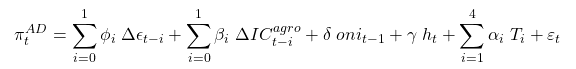 <br>
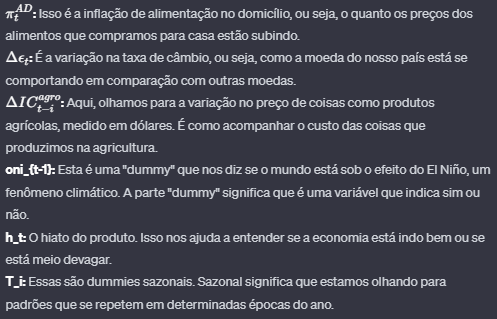<br>

Você pode saber mais sobre a que cargas d'água anda a inflação no Brasil através do relatório oficial do Banco Central você pode conferir [aqui](https://www.bcb.gov.br/publicacoes/ri)

In [12]:
# !pip install sidrapy
# !pip install python-bcb
# !pip install linearmodels

In [13]:
# Bibliotecas
from bcb import sgs
import sidrapy as sidra
from functools import reduce
from linearmodels.iv import IV2SLS
import statsmodels.formula.api as smf

In [14]:
# Obtendo os dados referentes ao IPCA através do velho SIDRA
ipca_raw = list(
    map(
        lambda tabela, variavel : (
            sidra.get_table(
                table_code = tabela,
                territorial_level= '1',
                ibge_territorial_code= 'all',
                variable = variavel,
                classifications = {
                    '315': '7171'
                    },
                period = 'all',
                header = 'n'
                )
            ),
        ['655', '2938', '1419', '7060'],
        ['all', '63', '63', '63']
    )
)
ipca_raw

[   NC      NN MC MN      V D1C     D1N     D2C             D2N D3C  \
 0   1  Brasil  2  %   0.17   1  Brasil  199908     agosto 1999  63   
 1   1  Brasil  2  %   0.42   1  Brasil  199909   setembro 1999  63   
 2   1  Brasil  2  %   2.30   1  Brasil  199910    outubro 1999  63   
 3   1  Brasil  2  %   1.66   1  Brasil  199911   novembro 1999  63   
 4   1  Brasil  2  %   1.55   1  Brasil  199912   dezembro 1999  63   
 .. ..     ... .. ..    ...  ..     ...     ...             ...  ..   
 78  1  Brasil  2  %  -0.52   1  Brasil  200602  fevereiro 2006  63   
 79  1  Brasil  2  %  -0.38   1  Brasil  200603      março 2006  63   
 80  1  Brasil  2  %  -0.51   1  Brasil  200604      abril 2006  63   
 81  1  Brasil  2  %  -0.22   1  Brasil  200605       maio 2006  63   
 82  1  Brasil  2  %  -0.92   1  Brasil  200606      junho 2006  63   
 
                        D3N   D4C                          D4N  
 0   IPCA - Variação mensal  7171  11.Alimentação no domicílio  
 1   IPCA - Vari

Agora que buscamos os dados sobre alimentação de diferentes tabelas do IBGE, aqui definimos uma função para calcular o aumento percentual acumulado ao longo de três trimestres com base em uma série temporal.

Logo em seguida , usamos uma função para retornar a série resultante do aumento percentual acumulado. Essa função pode ser usada para analisar tendências ao longo do tempo em uma série temporal, considerando janelas móveis de tamanho n.

Para explicar melhor o código e o que penso com os cálculos, reservo comentários nos próprios.

Simbooooooooooooooooraa...

In [15]:
import numpy as np

#### Funções para valores trimestais acumulados

In [16]:
# Função de aumento percentual por trimestre
def perc_trimestre(x):
    # Calcula e converte os valores percentuais em fatores multiplicativos
    val_multip = 1 + (x / 100)
    # Calcula o produto cumulativo dos últimos três elementos do array var_percentual
    val_acum = np.prod(val_multip[-3:])
    # Calcula percentual acumulado ao longo dos últimos três trimestres, subtrai 1 do produto cumulativo  e multiplica por 100 para obter uma taxa percentual
    val_acum_trim = (val_acum - 1) * 100
    # Retorna o aumento percentual acumulado ao longo dos últimos três trimestres
    return val_acum_trim

In [17]:
# res_perc_acum do aumento percentual acumulado
def perc_acumulado(data, n):
    # Calcula o fator multiplicativo adicionando 1 a cada elemento da série e dividindo por 100
    # O resultado é uma série de fatores multiplicativos
    res_perc_acum = (((data / 100) + 1)
                # Aplica a função de produto cumulativo em uma janela móvel de tamanho 'n'
                # Isso calcula o produto cumulativo dos elementos dentro de cada janela
                # (rolling window) ao longo da série                 
                .rolling(window = n)
                # Subtrai 1 e multiplica por 100 para obter o aumento percentual acumulado
                .apply(np.prod) - 1) * 100

    return res_perc_acum

Apesar de parecer um pouco chata essa parte, ela é, digamos, uma automação para o seu código. Usando a lógica de acúmulo trimestral você consegue implementar para diversas outras funcionalidades.

Agora vamos tratar, renomear e aplicar filtros aos dados obtidos para podermos trabalhar de forma simples e didáticscscs...

#### IPCA

In [18]:
alim_ipca = (
    pd.concat(
        # Concatenamos e atribuímos nomes aos níveis do índice
        objs=ipca_raw,
        names=['tabela', 'linha']
    )
    .reset_index()
    # Filtramos somente pelas colunas de data e valor do IPCA  
    .filter(items=['D2C', 'V'], axis='columns')
    # Aqui convertemos a data em datetime e IPCA em ponto flutuante (float)
    .assign(
        data=lambda x: pd.to_datetime(x['D2C'], format='%Y%m'),
        valor=lambda x: x['V'].astype(float)
    )
    .filter(items=['data', 'valor'], axis='columns')
    .rename(columns={'data': 'date', 'valor': 'ipca'})
)
alim_ipca

,date,ipca
0,1999-08-01,0.17
1,1999-09-01,0.42
2,1999-10-01,2.30
3,1999-11-01,1.66
4,1999-12-01,1.55
...,...,...
287,2023-07-01,-0.72
288,2023-08-01,-1.26
289,2023-09-01,-1.02
290,2023-10-01,0.27


Portanto, o DataFrame alim_ipca_trim contém informações sobre os valores acumulados trimestralmente e anualmente para a coluna 'valor' com base na coluna de datas 'data' do DataFrame original alim. O código utiliza funções personalizadas (perc_trimestre e perc_acumulado) para realizar esses cálculos.

In [19]:
alim_ipca_trim = (
    alim_ipca
    # Criamos a coluna date_quarter que é o trimestre ao qual cada data pertence com a função pd.PeriodIndex com frequência trimestral (freq='Q')
    .assign(date_quarter = lambda x: pd.PeriodIndex(x['date'], freq = 'Q'))
    # Agrupamos pela coluna date_quarter, e para cada grupo, o valor acumulado trimestral é calculado usando a função perc_trimestre e o resultado é agregado à coluna valor
    .groupby(by = 'date_quarter')
    .agg({
        'ipca': lambda x: perc_trimestre(x)
    })
    .reset_index()
    # Adicionamos uma nova coluna chamada alimentos ao DataFrame, representando o valor acumulado ao longo de janelas móveis de tamanho 4
    .assign(alimentos = lambda x: perc_acumulado(x['ipca'], n = 4))
)
alim_ipca_trim

,date_quarter,ipca,alimentos
0,1999Q3,0.590714,NaN
1,1999Q4,5.610152,NaN
2,2000Q1,-0.197442,NaN
3,2000Q2,-1.445768,4.491390
4,2000Q3,5.662035,9.759364
...,...,...,...
93,2022Q4,2.104471,13.214979
94,2023Q1,0.499344,7.037006
95,2023Q2,-0.347811,2.878549
96,2023Q3,-2.970825,-0.780469


#### Índice de Commodities x Taxa de Câmbio

Mais 2 variáveis que fazem parte do modelo citado células atrás. 

Aqui coletamos dados de: <br>

- **Índice de Commodities da Agropecuária do Brasil (em dólares americanos)** <br>

É como um "termômetro" que mede as mudanças nos preços de alimentos e produtos relacionados à agricultura. Ele mostra se esses preços estão subindo ou descendo ao longo do tempo. Isso é útil para entender como fatores como o clima, a oferta e a demanda afetam o custo dos alimentos que consumimos. Se o índice sobe, pode significar que os alimentos estão mais caros, e se ele desce, pode indicar que os alimentos estão mais baratos.

- **Média da Taxa de Câmbio Livre (Compra) de Dólar Americano, período mensal** <br>

Representa quanto da moeda local é necessário para comprar um dólar americano. Se a taxa estiver alta, a moeda local é mais fraca em comparação com o dólar, tornando os produtos importados mais caros. Se estiver baixa, a moeda local é mais forte, o que pode baratear os produtos importados. Essa taxa é influenciada por fatores como taxas de juros, inflação e condições econômicas globais, desempenhando um papel importante no comércio internacional e nas transações financeiras entre países.

-- 

**Como uma influencia a outra**: <br>

A relação entre esse índice e a Média da Taxa de Câmbio de Compra Livre mostra como as mudanças nos preços das commodities agropecuárias estão associadas às flutuações na taxa de câmbio em que o dólar americano pode ser comprado livremente. Isso é importante porque influencia a competitividade das exportações agrícolas brasileiras, já que as variações na taxa de câmbio afetam os custos e os lucros dos produtores e exportadores.

In [20]:
ind_dolar_comm = (
    sgs.get({
        'tc_dolar': 3697, 
        'agro_commod': 29041}, 
        start = '1998-01-01')
    .reset_index()
    .assign(date_quarter = lambda x: pd.PeriodIndex(x['Date'], freq = 'Q'))
    .groupby(by = 'date_quarter')
    .agg({
        'tc_dolar': lambda x: np.mean(x),
        'agro_commod': lambda x: np.mean(x)
    })
    .reset_index()
    .assign(
        tc_dolar = lambda x: x['tc_dolar'].pct_change(),
        agro_commod = lambda x: x['agro_commod'].pct_change())
    .dropna()
)
ind_dolar_comm

,date_quarter,tc_dolar,agro_commod
1,1998Q2,0.018708,-0.056405
2,1998Q3,0.020398,-0.077522
3,1998Q4,0.020902,-0.021845
4,1999Q1,0.481130,-0.059581
5,1999Q2,-0.031902,-0.069425
...,...,...,...
99,2022Q4,0.001207,0.001194
100,2023Q1,-0.011639,0.011138
101,2023Q2,-0.046836,0.008295
102,2023Q3,-0.014328,0.044833


#### Hiato do Produto

O hiato do produto é como um termômetro da economia, medindo se ela está "quente" demais ou "fria". Imagine que o PIB (Produto Interno Bruto) potencial é como o melhor desempenho que a economia pode ter sem causar inflação, tipo o máximo que ela pode correr sem suar.

Se o PIB real estiver acima desse potencial, é como se a economia estivesse correndo rápido demais, o que pode causar inflação, meio como se estivéssemos gastando energia demais durante um exercício. Se o PIB real estiver abaixo do potencial, é como se a economia estivesse indo devagar, como se não estivéssemos usando toda a nossa capacidade.

Então, o hiato do produto é uma maneira de os economistas verificarem se a economia está equilibrada, correndo no ritmo certo, nem rápido demais, nem devagar demais. Isso ajuda a entender se há muita folga (desemprego, por exemplo) ou muita pressão (inflação) na economia, e os governos podem usar essas informações para tomar decisões e manter tudo equilibrado.

In [21]:
# Obtendo o Hiato do Produto pelo site do Senado Federal
hiato_produto = (
    pd.read_excel('https://www12.senado.leg.br/ifi/dados/arquivos/estimativas-do-hiato-do-produto-ifi/@@download/file/estimativas-do-hiato-do-produto-ifi.xlsx',
    skiprows = 1)
    # Aqui convertemos a coluna 'Trim-Ano' em um índice de período (trimestre) usando pd.PeriodIndex
    .assign(date_quarter = lambda x: pd.PeriodIndex(x['Trim-Ano'], freq = 'Q'),
            # Convertemos a coluna 'Hiato' para float e arredondamos para duas casas decimais
            hiato = lambda x: x['Hiato'].astype(float)).round(2)
    .loc[:, ['date_quarter', 'hiato']] 
)
hiato_produto

,date_quarter,hiato
0,1996Q1,-0.01
1,1996Q2,-0.01
2,1996Q3,0.01
3,1996Q4,0.00
4,1997Q1,0.00
...,...,...
106,2022Q3,0.00
107,2022Q4,-0.00
108,2023Q1,0.00
109,2023Q2,0.01


#### Ocean Nino Index (ONI)

Calma, você vai entender como esse fenômeno afeta o alimento que chega ao seu e aos milhões de pratos no Brasil.

O Ocean Niño Index (ONI) é uma medida que avalia as variações nas temperaturas da superfície do mar no Oceano Pacífico equatorial central. Ele é usado para monitorar o fenômeno climático conhecido como El Niño e La Niña. 

- Quando o ONI está positivo, indica condições de El Niño, caracterizadas por temperaturas do mar mais quentes do que o normal. 
- Quando está negativo, sugere La Niña, com temperaturas do mar mais frias que o padrão. 

**Resumindo:** <br>
Essas variações influenciam o clima global, afetando padrões de chuva, temperatura e eventos climáticos extremos em diferentes partes do mundoe e é uma ferramenta valiosa para prever e entender os impactos desses fenômenos climáticos.

In [22]:
# Oceanic Nino Index (do site Climate Prediction Center)
oni = pd.read_csv('https://www.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/detrend.nino34.ascii.txt', sep = '\s+')
# Aqui garantimos que todas as entradas sejam tratadas como valores numéricos 
# O atributo errors='coerce' faz com que quaisquer valores que não possam ser convertidos para numéricos sejam substituídos por NaN
oni = oni.apply(pd.to_numeric, errors = 'coerce')
oni.dropna(inplace = True)
oni

,YR,MON,TOTAL,ClimAdjust,ANOM
0,1950,1,24.56,26.18,-1.62
1,1950,2,25.07,26.39,-1.32
2,1950,3,25.88,26.95,-1.07
3,1950,4,26.29,27.39,-1.11
4,1950,5,26.19,27.56,-1.37
...,...,...,...,...,...
882,2023,7,28.31,27.29,1.02
883,2023,8,28.21,26.86,1.35
884,2023,9,28.32,26.72,1.60
885,2023,10,28.44,26.72,1.72


Aqui temos que fazer um tratamento dos dados obtidos para que possamos utilizá-los no modelo que são:
1. Renomear as colunas 'YR' e 'MON' para 'Year' e 'Month', respectivamente
2. Calcular a média móvel de 3 meses (rolling mean) da anomalia (ANOM), criando uma nova coluna chamada 'oni'
3. Criar colunas 'Quarter' e 'date_quarter' com base nas colunas 'Year' e 'Month'
4. Agrupar os dados por trimestre (date_quarter) e calcular a média da coluna 'oni' para cada trimestre
5. Criar uma nova coluna chamada 'nino' ao DataFrame e nessa coluna inserir o valor 1 se o valor da coluna 'oni' for maior que 0.5 e 0 caso contrário


In [23]:
oni_dataframe = (
    oni
    # == Passo 1, 2 e 3
    .rename(columns= {'YR': 'Year', 'MON': 'Month'})
    .assign(oni = lambda x: x['ANOM'].rolling(window = 3, center = True).mean())
    .assign(Quarter = lambda x: pd.to_datetime(x[['Year', 'Month']].assign(Day = 1)),
            date_quarter = lambda x: pd.PeriodIndex(x['Quarter'], freq = 'Q'))
    # == Passo 4
    .groupby(by='date_quarter')
    .agg(oni=('oni', 'mean'))
    .reset_index()
)

# == Passo 5
oni_dataframe['nino'] = oni_dataframe['oni'].apply(lambda x: 1 if x > 0.5 else 0)
oni_dataframe

,date_quarter,oni,nino
0,1950Q1,-1.251667,0
1,1950Q2,-1.035556,0
2,1950Q3,-0.446667,0
3,1950Q4,-0.614444,0
4,1951Q1,-0.508889,0
...,...,...,...
291,2022Q4,-0.908889,0
292,2023Q1,-0.415556,0
293,2023Q2,0.472222,0
294,2023Q3,1.316667,1


#### Unindo os Dataframes

In [24]:
# Criamos um dataframe (df_infl_alim) com todos os outros criados anteriormente
df_juncao = [alim_ipca_trim, ind_dolar_comm, hiato_produto, oni_dataframe]

# Usamos as funções 'reduce' e 'merge' para combinar os DataFrames com base na coluna 'date_quarter', usando uma junção à esquerda (how='left')
# Em seguida, removemos as linhas com valores ausentes
df_consolidado = reduce(lambda left, right: pd.merge(left, right, on = 'date_quarter', how = 'left'), df_juncao).dropna()

# Criamos duas colunas ao DataFrame resultante, que representam o deslocamento de uma unidade temporal para trás das colunas 'tc_dolar' e 'agro_commod'
df_consolidado['tc_dolar_desloc'] = df_consolidado['tc_dolar'].shift(1)
df_consolidado['agro_commod_desloc'] = df_consolidado['agro_commod'].shift(1)
df_consolidado

,date_quarter,ipca,alimentos,tc_dolar,agro_commod,hiato,oni,nino,tc_dolar_desloc,agro_commod_desloc
3,2000Q2,-1.445768,4.491390,0.015681,0.033301,-0.01,-0.720000,0,NaN,NaN
4,2000Q3,5.662035,9.759364,0.007738,0.015287,-0.00,-0.537778,0,0.015681,0.033301
5,2000Q4,-0.789721,3.108054,0.063320,0.015981,0.00,-0.704444,0,0.007738,0.015287
6,2001Q1,1.988104,5.365986,0.043966,-0.010183,0.00,-0.544444,0,0.063320,0.015981
7,2001Q2,2.496424,9.580650,0.135711,-0.054724,-0.01,-0.235556,0,0.043966,-0.010183
...,...,...,...,...,...,...,...,...,...,...
92,2022Q3,0.607418,13.277965,0.066807,-0.083528,0.00,-0.910000,0,-0.059679,0.064047
93,2022Q4,2.104471,13.214979,0.001207,0.001194,-0.00,-0.908889,0,0.066807,-0.083528
94,2023Q1,0.499344,7.037006,-0.011639,0.011138,0.00,-0.415556,0,0.001207,0.001194
95,2023Q2,-0.347811,2.878549,-0.046836,0.008295,0.01,0.472222,0,-0.011639,0.011138


> Observações:

Você notou que foram criadas novas colunas, não vistas anteriormente:
- **tc_dolar:** <br>
Contém a diferença percentual (ou variação) do índice relacionado ao dólar. Essa coluna provavelmente indica como o valor do dólar em relação à moeda local está mudando ao longo do tempo. Se estiver positiva, sugere uma valorização do dólar em relação à moeda local; se estiver negativa, sugere uma desvalorização.

- **agro_commod:** <br>
Parece ser a diferença percentual (ou variação) de um índice relacionado ao setor agropecuário. Essa coluna provavelmente reflete as mudanças no desempenho ou condições do setor agropecuário ao longo do tempo. Se estiver positiva, sugere um aumento, e se estiver negativa, sugere uma diminuição nas condições ou desempenho do setor.

- **'tc_dolar_desloc':** <br>
Contém os valores da coluna tc_dolar deslocados para cima por um período. Em outras palavras, cada valor em tc_dolar é o valor correspondente na coluna tc_dolar do período anterior.

- **'agro_commod_desloc':**<br>
Contém os valores da coluna agro_commod deslocados para cima por um período. Cada valor em agro_commod é o valor correspondente na coluna agro_commod do período anterior.

#### Variáveis Dummies

As variáveis *dummy* foram criaadas para representar os trimestres do ano. Cada coluna nesse dataframe corresponde a um trimestre, e a presença de um valor 1 em uma coluna indica que o trimestre correspondente está presente para a observação associada no DataFrame original dados_reg. 

Essas variáveis dummy podem ser usadas em análises estatísticas, especialmente em modelos de regressão onde trimestres são tratados como fatores categóricos.

In [25]:
df_consolidado.columns

Index(['date_quarter', 'ipca', 'alimentos', 'tc_dolar', 'agro_commod', 'hiato',
       'oni', 'nino', 'tc_dolar_desloc', 'agro_commod_desloc'],
      dtype='object')

In [26]:
df_dummy = pd.get_dummies(
    df_consolidado['date_quarter']
    .dt.quarter, 
    prefix = 'trimestre', 
    dtype = int)
df_dummy

,trimestre_1,trimestre_2,trimestre_3,trimestre_4
3,0,1,0,0
4,0,0,1,0
5,0,0,0,1
6,1,0,0,0
7,0,1,0,0
...,...,...,...,...
92,0,0,1,0
93,0,0,0,1
94,1,0,0,0
95,0,1,0,0


Iiiiihááááá, bora juntar todo mundoi! Unimos mais esse dataframe (df_dummy) ao df_consolidade e excluímos os valores NaN

In [27]:
df_consolidado = pd.concat([df_consolidado, df_dummy], axis = 1).dropna()
df_consolidado

,date_quarter,ipca,alimentos,tc_dolar,agro_commod,hiato,oni,nino,tc_dolar_desloc,agro_commod_desloc,trimestre_1,trimestre_2,trimestre_3,trimestre_4
4,2000Q3,5.662035,9.759364,0.007738,0.015287,-0.00,-0.537778,0,0.015681,0.033301,0,0,1,0
5,2000Q4,-0.789721,3.108054,0.063320,0.015981,0.00,-0.704444,0,0.007738,0.015287,0,0,0,1
6,2001Q1,1.988104,5.365986,0.043966,-0.010183,0.00,-0.544444,0,0.063320,0.015981,1,0,0,0
7,2001Q2,2.496424,9.580650,0.135711,-0.054724,-0.01,-0.235556,0,0.043966,-0.010183,0,1,0,0
8,2001Q3,1.617424,5.386040,0.114059,-0.040432,-0.02,-0.130000,0,0.135711,-0.054724,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2022Q3,0.607418,13.277965,0.066807,-0.083528,0.00,-0.910000,0,-0.059679,0.064047,0,0,1,0
93,2022Q4,2.104471,13.214979,0.001207,0.001194,-0.00,-0.908889,0,0.066807,-0.083528,0,0,0,1
94,2023Q1,0.499344,7.037006,-0.011639,0.011138,0.00,-0.415556,0,0.001207,0.001194,1,0,0,0
95,2023Q2,-0.347811,2.878549,-0.046836,0.008295,0.01,0.472222,0,-0.011639,0.011138,0,1,0,0


#### Regressão Linear

De froma bem resumida, este trecho realiza uma análise de regressão linear para entender como as variáveis como tc_dolar, agro_commod, hiato, nino e as variáveis dummy dos trimestres (trimestre_1, trimestre_2, trimestre_3) influenciam a variável dependente alimentos, utilizando o método de Mínimos Quadrados Instrumentais. 

O resultado é impresso como um resumo estatístico.

In [28]:
# Cria uma instância de um modelo de regressão linear usando o método de Mínimos Quadrados Instrumentais (IV2SLS) a partir de uma fórmula especificada
reg = IV2SLS.from_formula(
    # Fórmula da regressão, onde "alimentos" é a variável DEPENDENTE, e as demais variáveis são as variáveis INDEPENDENTES. 
    # O "- 1" indica que não queremos um termo de interceptação na regressão
    formula = 'alimentos ~ - 1 + tc_dolar + agro_commod + hiato + nino + trimestre_1 + trimestre_2 + trimestre_3',
    data = df_consolidado
# Ajusta o modelo aos dados usando o método de Mínimos Quadrados Instrumentais (IV2SLS)
# O 'unadjusted' especifica que não queremos ajustar as covariâncias do modelo
).fit(cov_type = 'unadjusted')

# Imprimindo a tabela de resumos estatísticos
print(reg.summary)

                            OLS Estimation Summary                            
Dep. Variable:              alimentos   R-squared:                      0.5043
Estimator:                        OLS   Adj. R-squared:                 0.4639
No. Observations:                  93   F-statistic:                    94.604
Date:                Fri, Dec 22 2023   P-value (F-stat)                0.0000
Time:                        11:15:43   Distribution:                  chi2(7)
Cov. Estimator:            unadjusted                                         
                                                                              
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
tc_dolar        14.117     10.727     1.3160     0.1882     -6.9072      35.140
agro_commod     32.770     12.969     2.5267    

**QUECOISO É ISSO?** <br>

Não sei quanto a vocês, mas cada vez que obtenho essas tabelas dos modelos, meu veljo coraçãozinho se explode de alegria. </.emocionado>

> **Primeiro vamos entender o que tem nessa tabela:**<br>

- R-squared: <br>
Representa a proporção da variabilidade na variável dependente (alimentos) explicada pelas variáveis independentes no modelo. Neste caso, é 0.5170, indicando que aproximadamente 51.7% da variabilidade em "alimentos" é explicada pelas variáveis incluídas no modelo.

- Adj. R-squared: 
<br>Semelhante ao R-squared, mas ajustado para o número de variáveis independentes no modelo. Ele leva em consideração a penalização por incluir mais variáveis. Neste caso, é 0.4772.

- No. Observations: <br>
O número de observações no conjunto de dados usado para estimar o modelo, que é 92.

- F-statistic: <br>
Uma estatística que avalia a significância geral do modelo. Quanto maior, melhor. Aqui, é 98.475.

- P-value (F-stat): <br>
O valor p associado ao F-statistic. Um valor p baixo sugere que pelo menos uma variável independente é significativa para explicar a variabilidade em "alimentos". Neste caso, o valor p é próximo de zero (0.0000).


> **Coeficientes das Variáveis Independentes:**<br>

- tc_dolar: <br>
Representa a variação percentual do dólar. O coeficiente é 13.452, mas o p-value é 0.2060, indicando que não é estatisticamente significativo (valor p alto).

- agro_commod: <br>
Representa a variação percentual do Índice de Commodities - Brasil para commodities agropecuárias em dólares. O coeficiente é 32.688, e o p-value é 0.0111, indicando significância estatística.

- hiato: <br>
Representa o hiato do produto. O coeficiente é -67.858, mas o p-value é 0.0953, indicando uma possível falta de significância estatística.

- nino: <br>
Representa a primeira defasagem da dummy se o mundo está ou não sob o efeito do El Niño. O coeficiente é 2.4805, e o p-value é 0.1699, indicando não ser estatisticamente significativo.

- trimestre_1, trimestre_2, trimestre_3: <br>
São dummies sazonais para cada trimestre. Seus coeficientes indicam a variação em "alimentos" em relação ao trimestre de referência (trimestre_4, que não está listado aqui). Todos eles têm p-values baixos, indicando significância estatística.

#### "Visual é tudo"

Aqui o serviço é completo!

Eu não poderia deixar vocês sem um plot para analisar o desempenho das variáveis com o passar dos anos.

In [29]:
df_consolidado.columns

Index(['date_quarter', 'ipca', 'alimentos', 'tc_dolar', 'agro_commod', 'hiato',
       'oni', 'nino', 'tc_dolar_desloc', 'agro_commod_desloc', 'trimestre_1',
       'trimestre_2', 'trimestre_3', 'trimestre_4'],
      dtype='object')

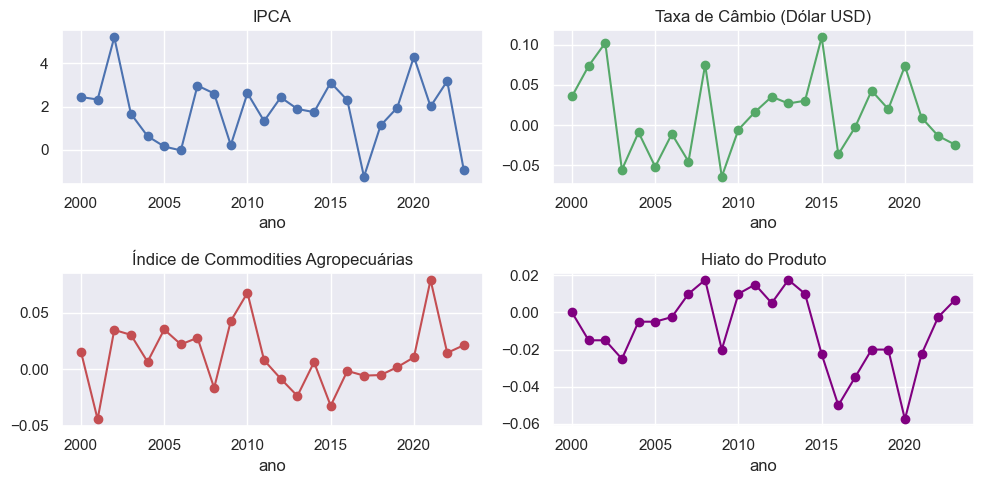

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando uma nova coluna 'ano' a partir da coluna 'date_quarter'
df_consolidado['ano'] = df_consolidado['date_quarter'].dt.year

# Organizando os dados por ano
df_consolidado_por_ano = df_consolidado.groupby('ano').mean(numeric_only=True)

# Configurando o estilo dos plots usando seaborn
sns.set_theme(style='darkgrid')

# Criando subplots com gráficos de linha
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Plotando o IPCA
df_consolidado_por_ano['ipca'].plot(ax=axes[0, 0], marker='o', linestyle='-', color='b')
axes[0, 0].set_title('IPCA')

# Plotando o Dólar
df_consolidado_por_ano['tc_dolar'].plot(ax=axes[0, 1], marker='o', linestyle='-', color='g')
axes[0, 1].set_title('Taxa de Câmbio (Dólar USD)')

# Plotando o Índice de Commodities Agropecuárias
df_consolidado_por_ano['agro_commod'].plot(ax=axes[1, 0], marker='o', linestyle='-', color='r')
axes[1, 0].set_title('Índice de Commodities Agropecuárias')

# Plotando o Hiato do Produto
df_consolidado_por_ano['hiato'].plot(ax=axes[1, 1], marker='o', linestyle='-', color='purple')
axes[1, 1].set_title('Hiato do Produto')

# Ajustando o layout
plt.tight_layout()

# Exibindo os plots
plt.show()

> Conclusão:

Esses resultados indicam uma interconexão complexa entre as variáveis econômicas. A inflação, representada pelo IPCA, parece influenciar os preços dos alimentos, e a taxa de câmbio pode estar relacionada aos movimentos no setor agropecuário. Além disso, a persistência nas mudanças de inflação sugere que eventos passados continuam a impactar o cenário econômico atual.

Legal, né?

## 3.0 Quebras Estruturais

Como já vimos, no Brasil de meu Deusu, as insconstâncias, as volatilidades e todo o paranauê que trás insegurança política e econômica, influencia o ambiente que nessa linda terra em que nos encontramos. E não é diferente no caso da inflação, passamos por perengues absurdos nas últimas décadas e nada melhor que mensurar tais períodos e plotar (criar gráfico) tais períodos com o uso de séries temporais com o uso do Auto ARIMA, um *"cérebro automático"* que ajuda a tornar a previsão de eventos futuros com base em dados passados mais acessível e eficaz para pessoas em diferentes áreas, como negócios, finanças, meteorologia, entre outras.

Bora lá!?!

In [31]:
# Pacotes
# !pip install statsforecast
# !pip install pmdarima

In [32]:
from bcb import sgs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

C:\Users\jonat\AppData\Roaming\Python\Python311\site-packages\statsforecast\core.py:25: TqdmExperimentalWarning:

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)



Por padrão,  o objeto StatsForecast exige as colunas 'unique_id', 'ds' e 'y' . Essas são convenções de nomenclatura usadas para representar a identificação única, a variável de tempo (data) e a variável de destino, respectivamente.

In [33]:
# Obtendo os dados
dados_raw = sgs.get(
    ('y', 433), 
    start='1995-01-01'
    )

ipca_quebras = (
    dados_raw
    .reset_index() # reiniciando o índice
    .assign(unique_id = 'ipca')
    .rename(columns = {'Date': 'ds'})
)
ipca_quebras

,ds,y,unique_id
0,1995-01-01,1.70,ipca
1,1995-02-01,1.02,ipca
2,1995-03-01,1.55,ipca
3,1995-04-01,2.43,ipca
4,1995-05-01,2.67,ipca
...,...,...,...
342,2023-07-01,0.12,ipca
343,2023-08-01,0.23,ipca
344,2023-09-01,0.26,ipca
345,2023-10-01,0.24,ipca


In [34]:
# Criando o gráfico
fig = px.line(ipca_quebras, x='ds', y='y', 
              labels={'y': 'Variação IPCA', 'ds': 'Data'},
              title='IPCA Mensal %')

# Adicionando anotação de fonte
fig.add_annotation(
    text='Fonte: SIDRA - Sistema IBGE de Recuperação Automática',
    xref='paper', yref='paper',
    x=1.0, y=-0.2,
    showarrow=False,
    font=dict(size=10)
)

# Exibindo o gráfico
fig.show()


Aqui nós definimos um modelo ARIMA usando a classe AutoARIMA. O modelo ARIMA é configurado para sazonalidade com um comprimento de temporada de 12 meses.

**O QUE É?**<br>

**ARIMA (AutoRegressive Integrated Moving Average):**
- AutoRegressive (AR): <br>
Olhamos para o passado para prever o futuro. Se os preços subiram nos últimos dias, é mais provável que subam novamente amanhã.

- Integrated (I):<br>
Fazemos a série temporal parecer "normal" ou "estacionária". Isso significa que tentamos remover padrões que mudam ao longo do tempo.

- Moving Average (MA):<br>
Consideramos os erros de previsão passados para fazer melhores previsões no futuro. Se nossas previsões anteriores foram sistematicamente altas, ajustamos para baixo; se foram baixas, ajustamos para cima.

-- 

**AutoARIMA:** <br>
Você não precisa dizer quanto "olhar para trás", quanto "diferenciar" ou quanto "levar em conta os erros passados". O AutoARIMA nos ajuda pois testa diferentes abordagens e escolhe a melhor automaticamente.

**Resumindo:** <br>
Simplificando ainda mais, ARIMA e AutoARIMA são métodos que usamos para prever valores futuros em séries temporais, sendo que o AutoARIMA torna esse processo mais fácil ao escolher automaticamente os melhores parâmetros para você.

In [35]:
# Modelo Arima
m_arima = [
    AutoARIMA(
        season_length = 12,
        approximation = True
    )
]

Aqui criamos uma instância da classe StatsForecast, que é uma classe personalizada

In [36]:
s_forecasts = StatsForecast(
    df = ipca_quebras,
    models = m_arima,
    freq = 'M',
    n_jobs = -1
)

Aqui realizamos os ajustes nos modelo, que são:

- Nível de confiança:<br>
Define o nível de confiança para o ajuste do modelo. Neste caso, é escolhido um nível de confiança de 95%. Que representa a probabilidade de que um intervalo de confiança contém o verdadeiro parâmetro da população.

- Previsões:<br>
Gera previsões dentro da amostra. O argumento h representa o número de períodos à frente para prever, fitted=True indica que queremos prever dentro da amostra, e level é o nível de confiança para as previsões. Muito útil para avaliar a precisão do modelo em relação aos dados já observados.

- Ajuste: <br>
Obtém os valores ajustados (previsões dentro da amostra) do objeto de previsão anterior e os armazena em um DataFrame
O método reset_index() é usado para redefinir o índice do DataFrame, tornando-o mais conveniente para manipulação e visualização.


In [37]:
# Nível de confiança
confianca = [95]

# Previsão dentro da amostra
previsoes = s_forecasts.forecast(
    h= 48,        # Número de períodos à frente para prever
    fitted= True,  # Indica que queremos prever dentro da amostra
    level= confianca  # Nível de confiança especificado anteriormente
)

# Ajustando o modelo
ajustado = s_forecasts.forecast_fitted_values().reset_index()

C:\Users\jonat\AppData\Roaming\Python\Python311\site-packages\statsforecast\arima.py:914: UserWarning:

possible convergence problem: minimize gave code 2]

C:\Users\jonat\AppData\Roaming\Python\Python311\site-packages\statsforecast\arima.py:914: UserWarning:

possible convergence problem: minimize gave code 2]

C:\Users\jonat\AppData\Roaming\Python\Python311\site-packages\statsforecast\arima.py:914: UserWarning:

possible convergence problem: minimize gave code 2]

C:\Users\jonat\AppData\Roaming\Python\Python311\site-packages\statsforecast\arima.py:914: UserWarning:

possible convergence problem: minimize gave code 2]

C:\Users\jonat\AppData\Roaming\Python\Python311\site-packages\statsforecast\arima.py:914: UserWarning:

possible convergence problem: minimize gave code 2]

C:\Users\jonat\AppData\Roaming\Python\Python311\site-packages\statsforecast\arima.py:914: UserWarning:

possible convergence problem: minimize gave code 2]

C:\Users\jonat\AppData\Roaming\Python\Python311\site-packa

Preparados para o belíssimo plot...?

Como é um plot que envolve alguns ajustes, concatenações e até mesmo uma função para obter os pares de datas, a explicação fica no próprio código

In [38]:
import plotly.graph_objects as go
import pandas as pd

# Criação do gráfico
fig = go.Figure()

# -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Adição da linha principal referente ao IPCA
fig.add_trace(go.Scatter(x=ajustado['ds'], y=ajustado['y'], mode='lines', name='AutoARIMA'))

# -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Adição da faixa de confiança
# Nssa parte do código adiciona uma área sombreada ao gráfico para representar a faixa de confiança em torno da linha principal
faixa_confianca = pd.concat([ajustado['AutoARIMA-lo-95'], ajustado['AutoARIMA-hi-95'][::-1]]) # concatenar duas séries de dados (limites inferior (lo) e superior (hi))
fig.add_trace(go.Scatter(x=pd.concat([ajustado['ds'], ajustado['ds'][::-1]]),
                         y= faixa_confianca,
                         fill='toself', # indica que a área entre a linha e o eixo x deve ser preenchida
                         fillcolor='rgba(255, 0, 0, 0.1)',
                         line=dict(color='rgba(255, 255, 255, 0.2)'),
                         hoverinfo="skip", #  define que as informações de "hover" (quando o mouse paira sobre o gráfico) são omitidas
                         showlegend=False))

# -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Adição de pontos para as quebras
# Adicionamos marcadores vermelhos no gráfico nos locais onde ocorrem quebras estruturais
# Filtramos as linhas do 'ajustado' onde os valores de y são maiores (limite superior) ou menores (limite inferior) e adicionamos a um novo dataframe
quebras_estrut = ajustado.query('y > `AutoARIMA-hi-95` or y < `AutoARIMA-lo-95`')[['ds', 'y']] 
fig.add_trace(go.Scatter(x=quebras_estrut['ds'], y=quebras_estrut['y'],
                         mode='markers',
                         marker=dict(color='red', size=10),
                         name='Quebras'))

# -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Atualização do layout
# Aqui criamos uma lista de dicionários, cada um representando um retângulo que destaca visualmente uma área associada a uma quebra estrutural no gráfico
quebras_estrut = [
    dict(
        type='rect', xref='x', yref='paper', x0=x[0], y0=0, x1=x[1], y1=1, 
        fillcolor='rgba(255, 0, 0, 0.1)', 
        # Esta List Comprehension percorre os pares de datas associadas às quebras estruturais (x) e zip é usado para agrupar essas datas em pares
        line=dict(color='rgba(255, 0, 0, 0.2)')) for x in zip(ajustado['ds'][quebras_estrut.index], ajustado['ds'][quebras_estrut.index + 1])]

# -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Configurações de layout para melhorar a apresentação do gráfico, tornando-o mais compreensível e informativo para quem o visualiza
fig.update_layout(title_text='Quebras Estruturais - IPCA Mensal (AutoARIMA - Nível: 95%)',
                  xaxis_title='Data',
                  yaxis_title='IPCA Mensal %',
                  legend=dict(x=1.02, y=0.5),
                  font=dict(size=14),
                  showlegend=True,
                  annotations=[dict(x=1.0, y=-0.2, text='Fonte: Jonatas Liberato', showarrow=False, xref='paper', yref='paper')],
                  shapes=quebras_estrut)

# -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Exibição do gráfico
fig.show()


Como se nota, até meados de 2003 as quebras estruturais eram constantes (e assustadoras). O grande responsável por essa estabilidade foi o **Plano Real** implantado em 1994, o que abriu caminho para reformas, adoção do **Tripé Macroeconômico**, Lei de Responsabilidade Fiscal (LRF) e mais algumas diretrizes fiscais e monetárias.

Uma leitura recomendada para compreender esse período, pode ser feita nesse excelente [artigo](https://blogdoibre.fgv.br/posts/25-anos-do-plano-real) do IBRE.

**OBS:** <br>
Que aliás, não coloquei o período anterior a 1995 pois o gráico daria a impressão de que está tudo bem e dificultaria a visualização de oscilações mais recentes, só que como eu penso em ti, querido padauan, vou trazer um plot mais simples para se ter uma noção do que ocorria antes desse período de estabilidade.


In [39]:
# Obtendo os dados
ipca_1994 = sgs.get(
    ('y', 433), 
    start='1984-01-01',
    end = '1994-12-31'
    )

ipca_teste = (
    ipca_1994
    .reset_index() # reiniciando o índice
    .assign(unique_id = 'ipca')
    .rename(columns = {'Date': 'ds'})
)

# Criando o gráfico
fig = px.line(ipca_teste, x='ds', y='y', 
              labels={'y': 'Variação IPCA', 'ds': 'Data'},
              title='IPCA Mensal %')

fig.update_traces(line=dict(color='red'))

# Adicionando anotação de fonte
fig.add_annotation(
    text='Fonte: SIDRA - Sistema IBGE de Recuperação Automática',
    xref='paper', yref='paper',
    x=1.0, y=-0.2,
    showarrow=False,
    font=dict(size=10)
)

# Exibindo o gráfico
fig.show()


## 4.0 Inflação de Serviços x Desemprego

Ô meninlindo....

Esse tópico muito querido pelo papai aqui, deu trabalho demaissss! Foram noites em claro (mentira, 23:30h eu já tava apagado) estudando a importância e como formular esse indicador.
Espero que goste e que lhe seja útil em algum momento da vida, seja em aula ou em um churrascão com a família.

In [40]:
# !pip install python-bcb

In [41]:
import pandas as pd
import numpy as np
from bcb import sgs
import statsmodels.api as sm
from statsmodels.tsa import x13
import os
from datetime import datetime, timedelta
from statsmodels.tsa.vector_ar.vecm import *

Temos que criar uma função que realiza o cálculo da *acumulação de variações percentuais em janelas móveis*, para analisar como as variações percentuais se acumulam ao longo de janelas móveis em uma sequência de dados.

Nessa função temos:

- **Variações Percentuais:** São mudanças expressas como percentagens, indicando o quanto algo aumentou ou diminuiu em relação ao seu valor inicial.

- **Janelas Móveis:** Refere-se a intervalos ou conjuntos de dados que se deslocam ao longo da sequência. No contexto desse texto, é um grupo de variações percentuais que "se move" pelos dados.

- **Função:** É uma espécie de ferramenta matemática que realiza uma tarefa específica. Neste caso, a função recebe dois argumentos:
  - **data:** Uma sequência de dados representando variações percentuais.
  - **n:** Um número inteiro que representa o tamanho da janela móvel usada para calcular a acumulação.

- **Retorno:** A função produz um array (uma lista ordenada) contendo a acumulação das variações percentuais em janelas móveis. Isso significa que para cada janela ao longo dos dados, a função calcula a soma acumulada das variações percentuais dentro dessa janela.


In [42]:
def ac_percentual(data, n):
  res_ac_percentual = (((data / 100) + 1)
                .rolling(window =n)
                .apply(np.prod) -1
               ) * 100
  return res_ac_percentual

Aqui determinamos o período correspondente aos 12 meses anteriores à pesquisa PNADc. Isso é feito porque estamos utilizando janelas móveis e desejamos incluir integralmente os dados referentes aos últimos 12 meses do indicador.

In [43]:
# Iníco das séries
inicio_pnad = datetime(2012, 3, 1)
start = inicio_pnad - timedelta(days = 365)
end = '2023-2-01'

dados_raw = sgs.get({
    'desocupacao': 24369,
    'ipca_servicos': 10844},
    start = start, end = end
    )

dados_raw

,desocupacao,ipca_servicos
Date,,
2011-03-01,NaN,0.85
2011-04-01,NaN,0.54
2011-05-01,NaN,0.59
2011-06-01,NaN,0.60
2011-07-01,NaN,0.42
...,...,...
2022-10-01,8.3,0.67
2022-11-01,8.1,0.13
2022-12-01,7.9,0.44


Nesse código convertermos os dados de formado **wide** (formato largo) para **long** (formato longo) é comum em análises de dados para facilitar a manipulação e visualização. Nós pegamos esses dados das colunas e os colocamos nas linhas, mantendo uma coluna que indica qual tipo de dado é. 

In [44]:
# Convertendo os dados de wide para long
dados_long = (
    dados_raw
    .reset_index()
    .melt(id_vars = ['Date']) # gira os dados
)
dados_long

,Date,variable,value
0,2011-03-01,desocupacao,NaN
1,2011-04-01,desocupacao,NaN
2,2011-05-01,desocupacao,NaN
3,2011-06-01,desocupacao,NaN
4,2011-07-01,desocupacao,NaN
...,...,...,...
283,2022-10-01,ipca_servicos,0.67
284,2022-11-01,ipca_servicos,0.13
285,2022-12-01,ipca_servicos,0.44
286,2023-01-01,ipca_servicos,0.60


In [45]:
import plotly.express as px

# Configuração do gráfico com Plotly Express
fig = px.line(dados_long, x='Date', y='value', color='variable',
              line_shape='linear',
              labels={'value': '%', 'variable': '', 'Date': ''},
              title="Taxa de Desocupação (Trimestre Móvel) x Inflação de Serviços (Var. Mensal) - Fonte: IBGE/BCB",
              color_discrete_map={'desocupacao': 'red', 'ipca_servicos': 'blue'})

# Configurações adicionais
fig.update_layout(
    xaxis=dict(tickmode='linear', tick0='2012-03-01', dtick='M12', tickformat='%b/%Y'),
    yaxis=dict(title='%'),
    legend=dict(title=''),
    width=1400, height=600,
    template='plotly_dark'
)

# Adicionando a legenda como anotação
fig.add_annotation(
    go.layout.Annotation(
        text='Elaboração: Jonatas A. Lberato - Fonte: IBGE/BCB',
        align='left',
        showarrow=False,
        xref='paper',
        yref='paper',
        x=0.8, 
        y=-0.15,
        xanchor='left',
        yanchor='bottom'
    )
)

# Exibindo o gráfico
fig.show()

FIcou lindão com fundo escuro, né?

### Tratamento dos Dados

Esse método serve para o Google Colab (verificar outros sistemas operacionais)

- Para baixar e descompactar o arquivo<br>
O link é: https://www.census.gov/data/software/x13as.X-13ARIMA-SEATS.html

- **Para executar no Google Colab**<br>

Windows<br>
!wget https://www2.census.gov/software/x-13arima-seats/x13as/windows/program-archives/x13as_ascii-v1-1-b59.tar.gz

Linux: <br>
!wget https://www2.census.gov/software/x-13arima-seats/x13as/unix-linux/program-archives/x13as_ascii-v1-1-b59.tar.gz

!tar --gunzip --extract --verbose --file=x13as_ascii-v1-1-b59.tar.gz

- **Caminho do programa com variável de ambente**<br>

os.environ['X13PATH'] = 'x13as'

In [46]:
import urllib.request
import zipfile
import os

# URL do arquivo zip
url = "https://www2.census.gov/software/x-13arima-seats/x13as/windows/program-archives/x13as_html-v1-1-b60.zip"

# Nome do arquivo zip
filename = "x13as_html-v1-1-b60.zip"

# Baixa o arquivo zip
urllib.request.urlretrieve(url, filename)

# Cria um diretório para extrair os arquivos
extracted_folder = "x13as"
os.makedirs(extracted_folder, exist_ok=True)

# Extrai os arquivos do zip
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Configura o caminho do programa com variável de ambiente
os.environ['X13PATH'] = extracted_folder

### Ajusando a Sazonalidade

**Pq essa parada?**: <br>

Querido padauan, ajustar sazonalidade em dados temporais significa remover padrões regulares que se repetem em períodos específicos, como sazonalidade anual. Isso facilitad para a nossa análise de tendências subjacentes e variações não sazonais nos dados. 

A remoção da sazonalidade é útil para identificar tendências a longo prazo, comparar diferentes períodos com precisão, melhorar modelos de previsão e facilitar a interpretação dos dados, especialmente em contextos econômicos e de negócios. Em resumo, o ajuste sazonal ajuda a isolar os padrões significativos dos efeitos sazonais previsíveis.

Complicou? Peraí!

**Mais didático:** <br>
Imagine que você está analisando as vendas de sorvetes ao longo do ano. É provável que as vendas sejam mais altas no verão e mais baixas no inverno devido à sazonalidade do clima.

Agora, se você quiser entender a verdadeira tendência nas vendas, excluindo o efeito sazonal do clima, você ajustaria a sazonalidade. Isso seria como calcular a quantidade "média" de sorvetes que você venderia, independentemente das variações sazonais de verão e inverno. 

Isso é útil porque, ao remover essas variações previsíveis, você pode identificar se há um aumento ou queda real nas vendas ao longo do tempo, não apenas devido às estações do ano.

Se você não entendeu, por favor, fique à vontade para perguntar.

In [47]:
# Ajusta sazonalmente a tx de desocupação e IPCA de Serviços
dados_sazon = (
    dados_raw
    .assign(
        desocupacao_sa=lambda x: x13.x13_arima_analysis(endog=x['desocupacao'].dropna(), start=inicio_pnad).seasadj,
        ipca_servicos_sa=lambda x: x13.x13_arima_analysis(endog=x['ipca_servicos']).seasadj
    )
    .reset_index()
)
dados_sazon

c:\Users\jonat\anaconda3\Lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning:

          series with zero or negative values.



,Date,desocupacao,ipca_servicos,desocupacao_sa,ipca_servicos_sa
0,2011-03-01,NaN,0.85,NaN,0.987119
1,2011-04-01,NaN,0.54,NaN,0.641152
2,2011-05-01,NaN,0.59,NaN,0.882218
3,2011-06-01,NaN,0.60,NaN,0.672450
4,2011-07-01,NaN,0.42,NaN,0.489800
...,...,...,...,...,...
139,2022-10-01,8.3,0.67,8.517457,0.537620
140,2022-11-01,8.1,0.13,8.434567,0.289904
141,2022-12-01,7.9,0.44,8.353062,0.091315
142,2023-01-01,8.4,0.60,8.506232,0.635715


In [48]:
import plotly.express as px
import plotly.graph_objects as go

# Dados
ipca_long = dados_sazon[['Date', 'ipca_servicos', 'ipca_servicos_sa']].melt(id_vars=['Date'])

# Configuração do gráfico
fig = px.line(ipca_long, x='Date', y='value', color='variable', line_shape='linear',
              labels={'value': '% a.m.', 'variable': '', 'Date': ''},
              title="Inflação de Serviços (Var. Mensal) - Dados Sazonais x Sazonalmente Ajustados (x13as)",
              color_discrete_map={'variable': 'red'})

# Configurações adicionais
fig.update_layout(
    xaxis=dict(type='date', tickmode='linear', tick0='2012-03-01', dtick='M12', tickformat='%b/%Y'),
    yaxis=dict(title='% a.m.'),
    legend=dict(title=''),
    width=1400, height=600,
    template='plotly_dark'
)

# Adicionando a legenda como anotação
fig.add_annotation(
    go.layout.Annotation(
        text='Elaboração: Jonatas A. Lberato - Fonte: IBGE/BCB',
        align='left',
        showarrow=False,
        xref='paper',
        yref='paper',
        x=0.8, 
        y=-0.15,
        xanchor='left',
        yanchor='bottom'
    )
)

# Exibindo o gráfico
fig.show()

In [49]:
# Dados long
desocupacao_long = dados_sazon[['Date', 'desocupacao', 'desocupacao_sa']].melt(id_vars=['Date'])

# Configuração do gráfico com Plotly Express
fig = px.line(desocupacao_long, x='Date', y='value', color='variable', line_shape='linear',
              labels={'value': '% a.m.', 'variable': '', 'Date': ''},
              title="Desocupação (Var. Mensal) - Dados Sazonais x Sazonalmente Ajustados (x13as)",
              color_discrete_map={'variable': 'red'})

# Configurações adicionais
fig.update_layout(
    xaxis=dict(type='date', tickmode='linear', tick0='2012-03-01', dtick='M12', tickformat='%b/%Y'),
    yaxis=dict(title='% a.m.'),
    legend=dict(title=''),
    width=1400, height=600,
    template='plotly_dark'
)

# Adicionando a legenda como anotação
fig.add_annotation(
    go.layout.Annotation(
        text='Elaboração: Jonatas A. Lberato - Fonte: IBGE/BCB',
        align='left',
        showarrow=False,
        xref='paper',
        yref='paper',
        x=0.8, 
        y=-0.15,
        xanchor='left',
        yanchor='bottom'
    )
)

# Exibindo o gráfico
fig.show()

Calculando IPCA de Serviços 12 Meses e Média Móvel Anualizada de 3 meses

In [50]:
ipca_12m_mm3m = (
    dados_sazon
    .assign(
        ipca_servicos_12m = lambda x: ac_percentual(x['ipca_servicos'], n = 12),
        ipca_servicos_3m = lambda x: x['ipca_servicos_sa'].rolling(window = 3).mean() * 12
    )
)
ipca_12m_mm3m

,Date,desocupacao,ipca_servicos,desocupacao_sa,ipca_servicos_sa,ipca_servicos_12m,ipca_servicos_3m
0,2011-03-01,NaN,0.85,NaN,0.987119,NaN,NaN
1,2011-04-01,NaN,0.54,NaN,0.641152,NaN,NaN
2,2011-05-01,NaN,0.59,NaN,0.882218,NaN,10.041954
3,2011-06-01,NaN,0.60,NaN,0.672450,NaN,8.783277
4,2011-07-01,NaN,0.42,NaN,0.489800,NaN,8.177869
...,...,...,...,...,...,...,...
139,2022-10-01,8.3,0.67,8.517457,0.537620,8.100597,6.512813
140,2022-11-01,8.1,0.13,8.434567,0.289904,7.949663,5.166807
141,2022-12-01,7.9,0.44,8.353062,0.091315,7.574801,3.675354
142,2023-01-01,8.4,0.60,8.506232,0.635715,7.799830,4.067733


In [51]:
import plotly.express as px
import plotly.graph_objects as go
import scipy.signal
import numpy as np

# Função para encontrar os máximos locais (topos)
def find_peaks(data):
    peaks, _ = scipy.signal.find_peaks(data)
    return peaks

# Dados
ipca_long = ipca_12m_mm3m[['Date', 'ipca_servicos_12m', 'ipca_servicos_3m']].melt(id_vars=['Date'])

# Configuração do gráfico com Plotly Express
fig = px.line(ipca_long, x='Date', y='value', color='variable', line_shape='linear',
              labels={'value': '% a.m.', 'variable': '', 'Date': ''},
              title="Inflação de Serviços - Acumulado em 12 meses x Média 3 meses móvel anualizada sazonalmente ajustada",
              color_discrete_map={'variable': 'red'})

# Adiciona pontos nos topos
for variable in ipca_long['variable'].unique():
    subset = ipca_long[ipca_long['variable'] == variable].reset_index(drop=True)
    peaks = find_peaks(subset['value'])
    fig.add_trace(go.Scatter(
        x=subset.loc[peaks, 'Date'],
        y=subset.loc[peaks, 'value'],
        mode='markers',
        marker=dict(color='white', size=5),
        showlegend=False
    ))

# Configurações adicionais
fig.update_layout(
    xaxis=dict(type='date', tickmode='linear', tick0='2012-03-01', dtick='M12', tickformat='%b/%Y'),
    yaxis=dict(title='% a.m.'),
    legend=dict(title=''),
    width=1400, height=600,
    template='plotly_dark'
)

# Adicionando a legenda como anotação
fig.add_annotation(
    go.layout.Annotation(
        text='Elaboração: Jonatas A. Lberato - Fonte: IBGE/BCB',
        align='left',
        showarrow=False,
        xref='paper',
        yref='paper',
        x=0.8, 
        y=-0.15,
        xanchor='left',
        yanchor='bottom'
    )
)

# Exibindo o gráfico
fig.show()

In [52]:
ipca_12m_mm3m

,Date,desocupacao,ipca_servicos,desocupacao_sa,ipca_servicos_sa,ipca_servicos_12m,ipca_servicos_3m
0,2011-03-01,NaN,0.85,NaN,0.987119,NaN,NaN
1,2011-04-01,NaN,0.54,NaN,0.641152,NaN,NaN
2,2011-05-01,NaN,0.59,NaN,0.882218,NaN,10.041954
3,2011-06-01,NaN,0.60,NaN,0.672450,NaN,8.783277
4,2011-07-01,NaN,0.42,NaN,0.489800,NaN,8.177869
...,...,...,...,...,...,...,...
139,2022-10-01,8.3,0.67,8.517457,0.537620,8.100597,6.512813
140,2022-11-01,8.1,0.13,8.434567,0.289904,7.949663,5.166807
141,2022-12-01,7.9,0.44,8.353062,0.091315,7.574801,3.675354
142,2023-01-01,8.4,0.60,8.506232,0.635715,7.799830,4.067733


c:\Users\jonat\anaconda3\Lib\site-packages\plotnine\geoms\geom_path.py:98: PlotnineWarning: geom_path: Removed 11 rows containing missing values.
c:\Users\jonat\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 13 rows containing missing values.


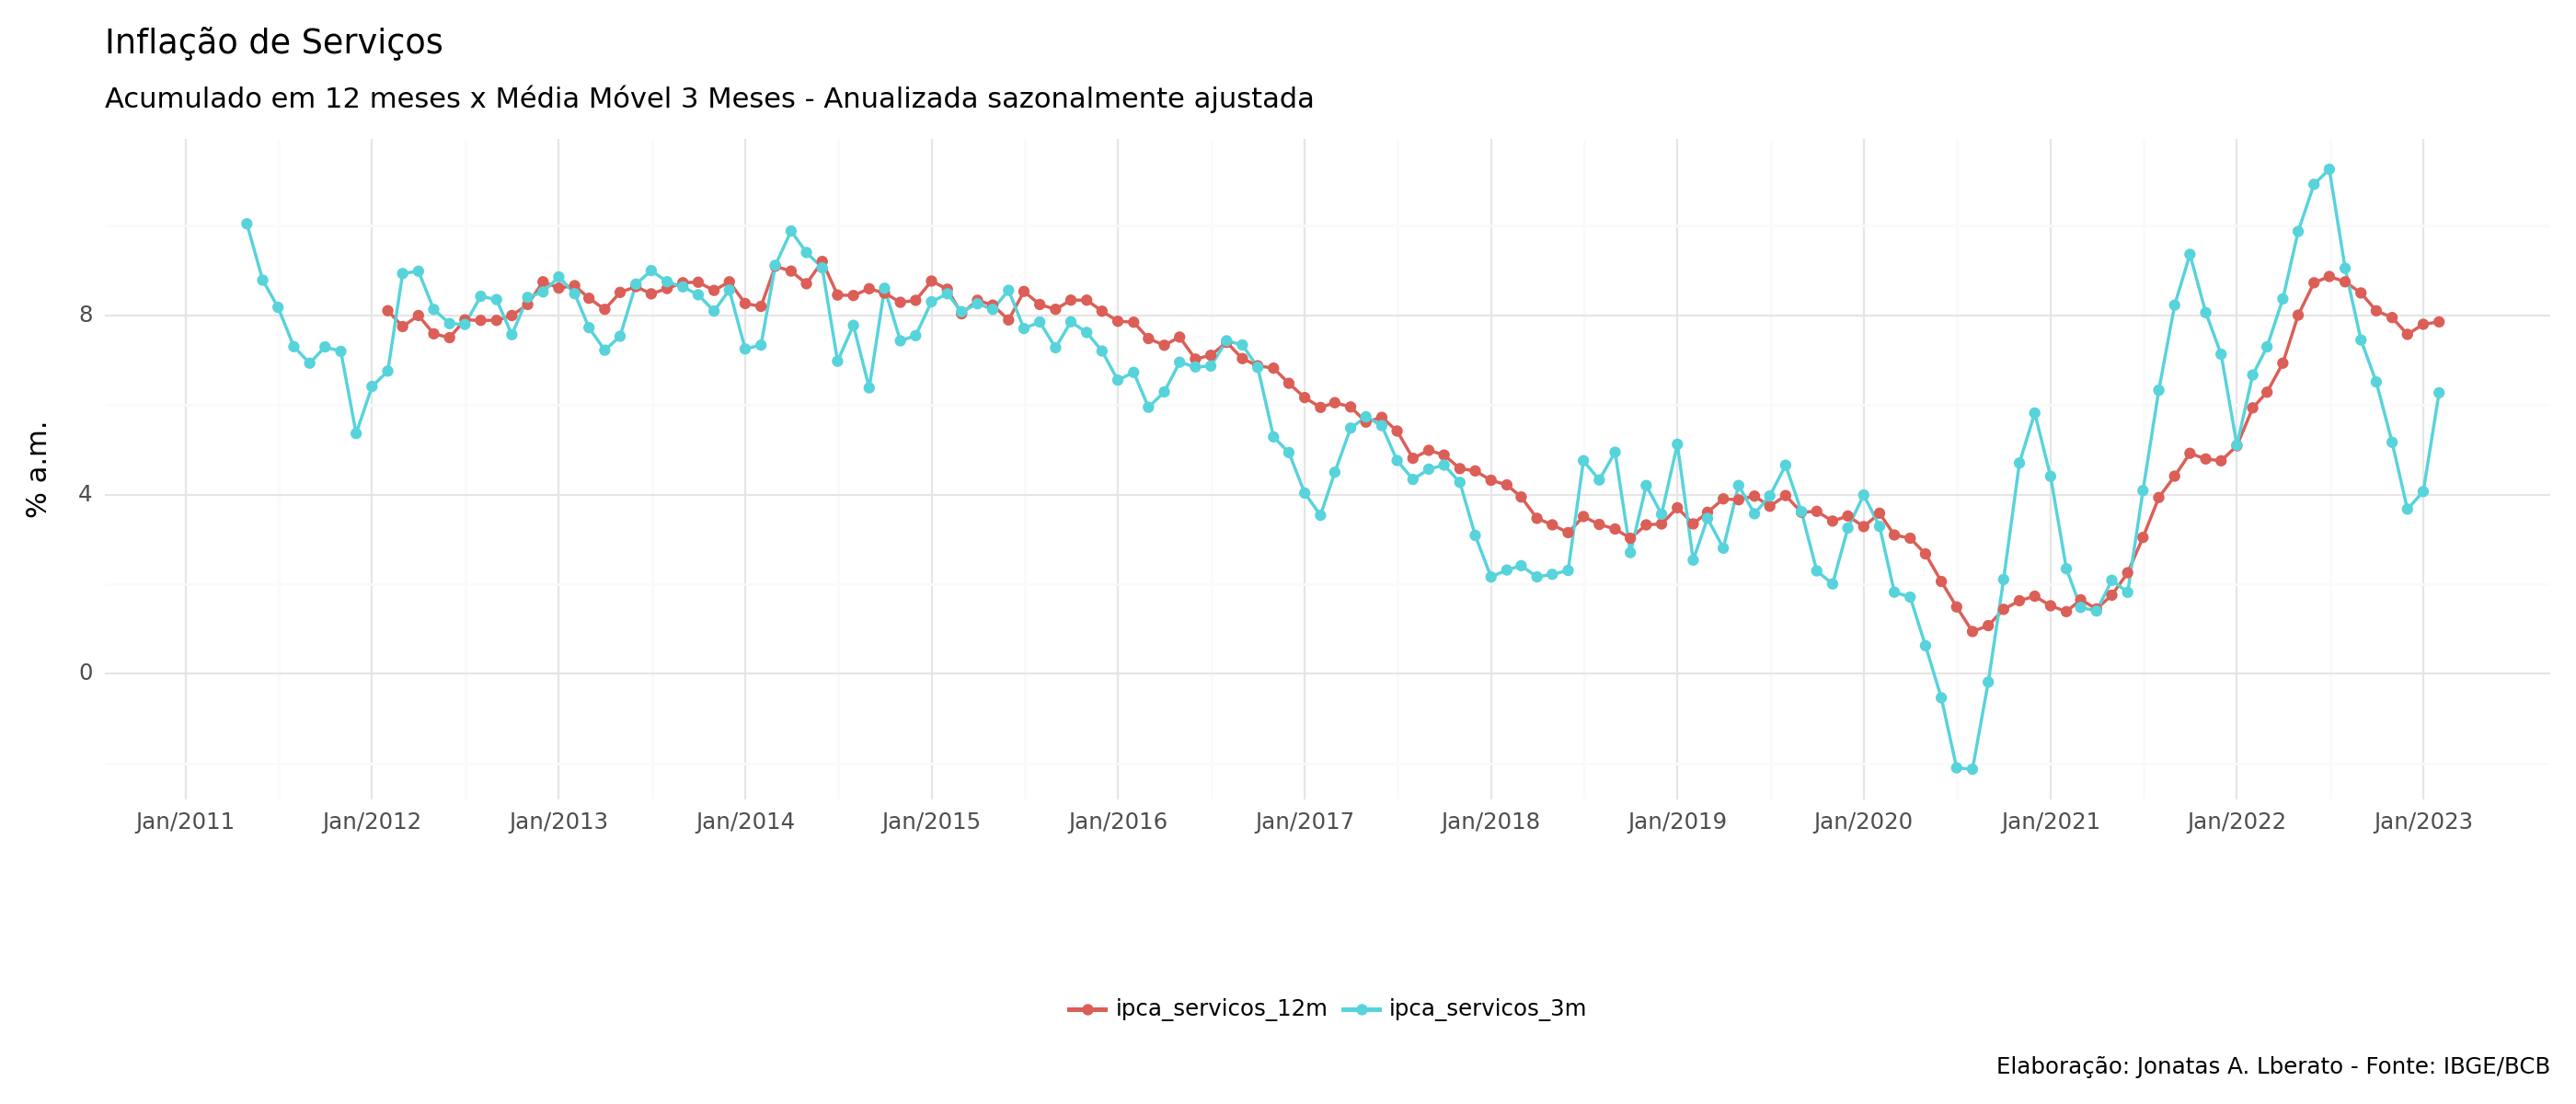

<Figure Size: (1400 x 600)>

In [53]:
ipca_long = ipca_12m_mm3m[['Date', 'ipca_servicos_12m', 'ipca_servicos_3m']].melt(id_vars=['Date'])

# !pip install plotnine
from plotnine import *

(
    ggplot(ipca_long, aes(x='Date', y='value', color = 'variable')) +
    geom_line(size = 0.7) +
    geom_point() +
    #scale_colour_manual(values = list(colors.values())) +
    scale_x_date(date_breaks = '1 year', date_labels = '%b/%Y') +
    labs(
        title=f'Inflação de Serviços',
        subtitle='Acumulado em 12 meses x Média Móvel 3 Meses - Anualizada sazonalmente ajustada',
        color='',
        x='',
        y='% a.m.',
        caption='Elaboração: Jonatas A. Lberato - Fonte: IBGE/BCB') +
    theme_minimal() +
    theme(
        figure_size=(14, 6),
        legend_position='bottom',
    )
)

Taxa Desocupação (s.a.) x Inflação de Serviços

In [54]:
# Dados
ipca_long = ipca_12m_mm3m[['Date', 'ipca_servicos_12m', 'ipca_servicos_3m', 'desocupacao_sa']].melt(id_vars=['Date'])

# Configuração do gráfico com Plotly Express
fig = px.line(ipca_long, x='Date', y='value', color='variable',
              labels={'value': '% a.m.', 'variable': '', 'Date': ''},
              title="Taxa de Desocupação (s.a) x Inflação de Serviços")
              # color_discrete_map = {'ipca_servicos_12m': 'rgba(255, 0, 0, 0.7)', 'ipca_servicos_3m': 'rgba(0, 128, 0, 0.7)', 'desocupacao_sa': 'rgba(0, 0, 255, 0.7)'})

# Adiciona pontos ao gráfico
fig.add_trace(go.Scatter(x=ipca_long['Date'], y=ipca_long['value'], mode='markers', marker=dict(color='white', size=3)))

# Configurações adicionais
fig.update_layout(
    xaxis=dict(type='date', tickmode='linear', tick0='2012-03-01', dtick='M12', tickformat='%b/%Y'),
    yaxis=dict(title='% a.m.'),
    legend=dict(title='Variável'),
    width=1400, height=600,
    template='plotly_dark',
    title_text="Taxa de Desocupação (s.a) x Inflação de Serviços",
    title_x=0.5,  # Centraliza o título
    annotations=[
        dict(
            text='Elaboração: Jonatas A. Lberato - Fonte: IBGE/BCB',
            showarrow=False,
            xref='paper', yref='paper',
            x=0.8, y=-0.15,
            xanchor='left', yanchor='bottom'
        )
    ]
)

# Exibindo o gráfico
fig.show()

Aqui tive problemas em fazer o plot com o plotly. O problema se deu à linha de tendência que não ficava ajustada visualmente aos dados. Então apelei o código em R (isso mesmo, um plot da linguagem R no Python).

Sorry about that! =(

c:\Users\jonat\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


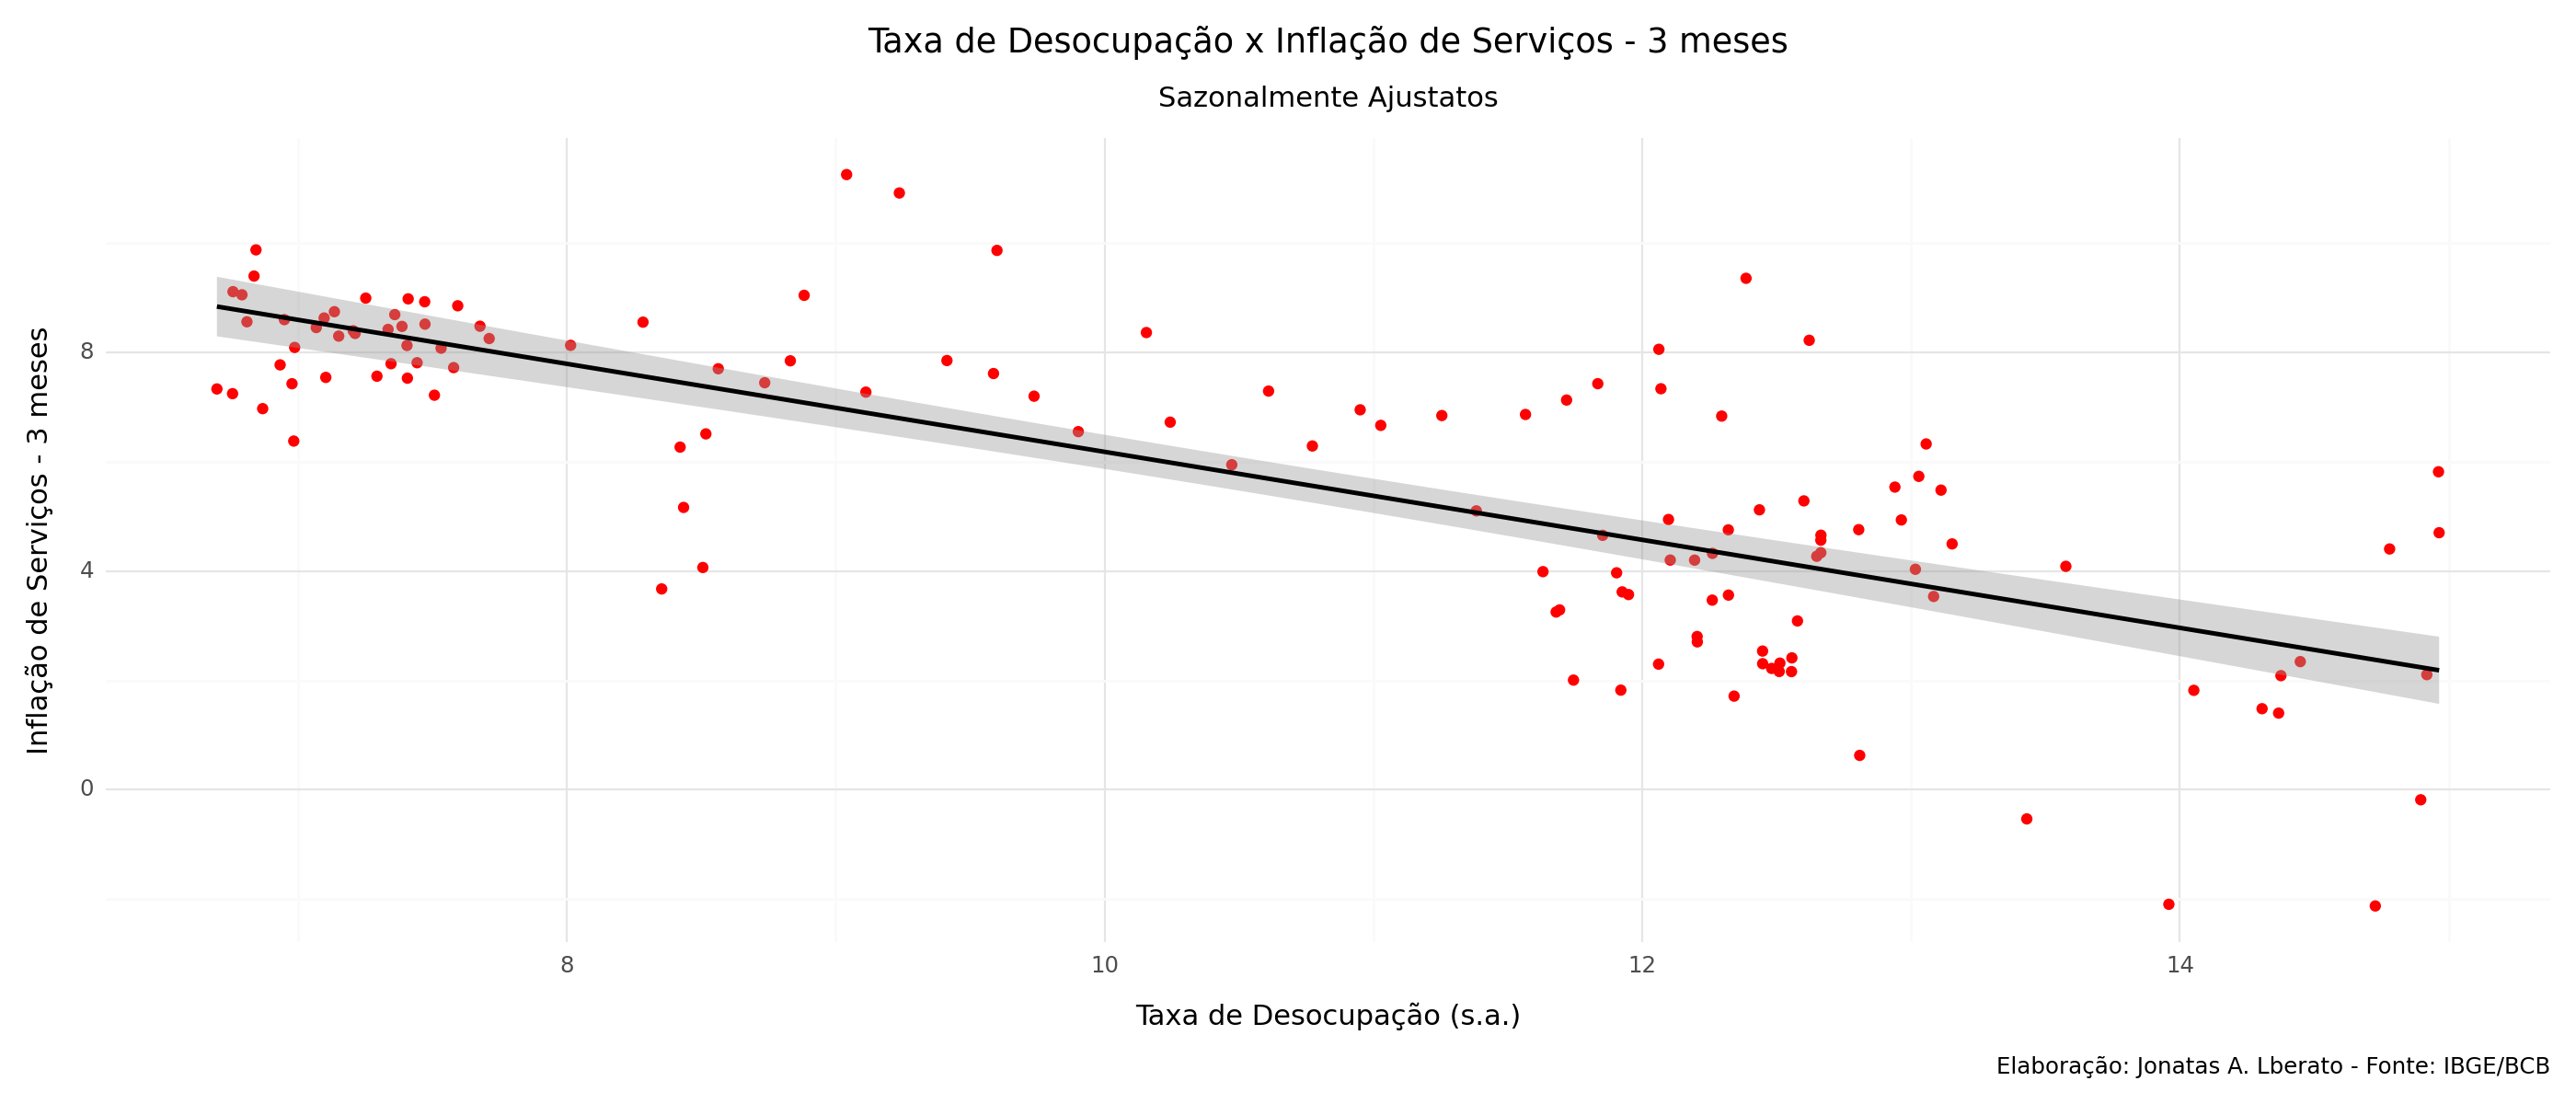

<Figure Size: (1400 x 600)>

In [55]:
# !pip install plotnine
from plotnine import *

(
    ggplot(ipca_12m_mm3m, aes(x='desocupacao_sa', y='ipca_servicos_3m')) +
    geom_point(color='red') +
    stat_smooth(method='lm') +
    labs(
        title=f'Taxa de Desocupação x Inflação de Serviços - 3 meses',
        subtitle='Sazonalmente Ajustatos',
        color='',
        x='Taxa de Desocupação (s.a.)',
        y='Inflação de Serviços - 3 meses',
        caption='Elaboração: Jonatas A. Lberato - Fonte: IBGE/BCB'
    ) +
    theme_minimal() +
    theme(
        figure_size=(14, 6),
        legend_position='bottom',
        plot_title=element_text(hjust=0.5),  # Ajusta a justificação do título
        plot_subtitle=element_text(hjust=0.5)  # Ajusta a justificação do subtítulo
    )
)


c:\Users\jonat\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


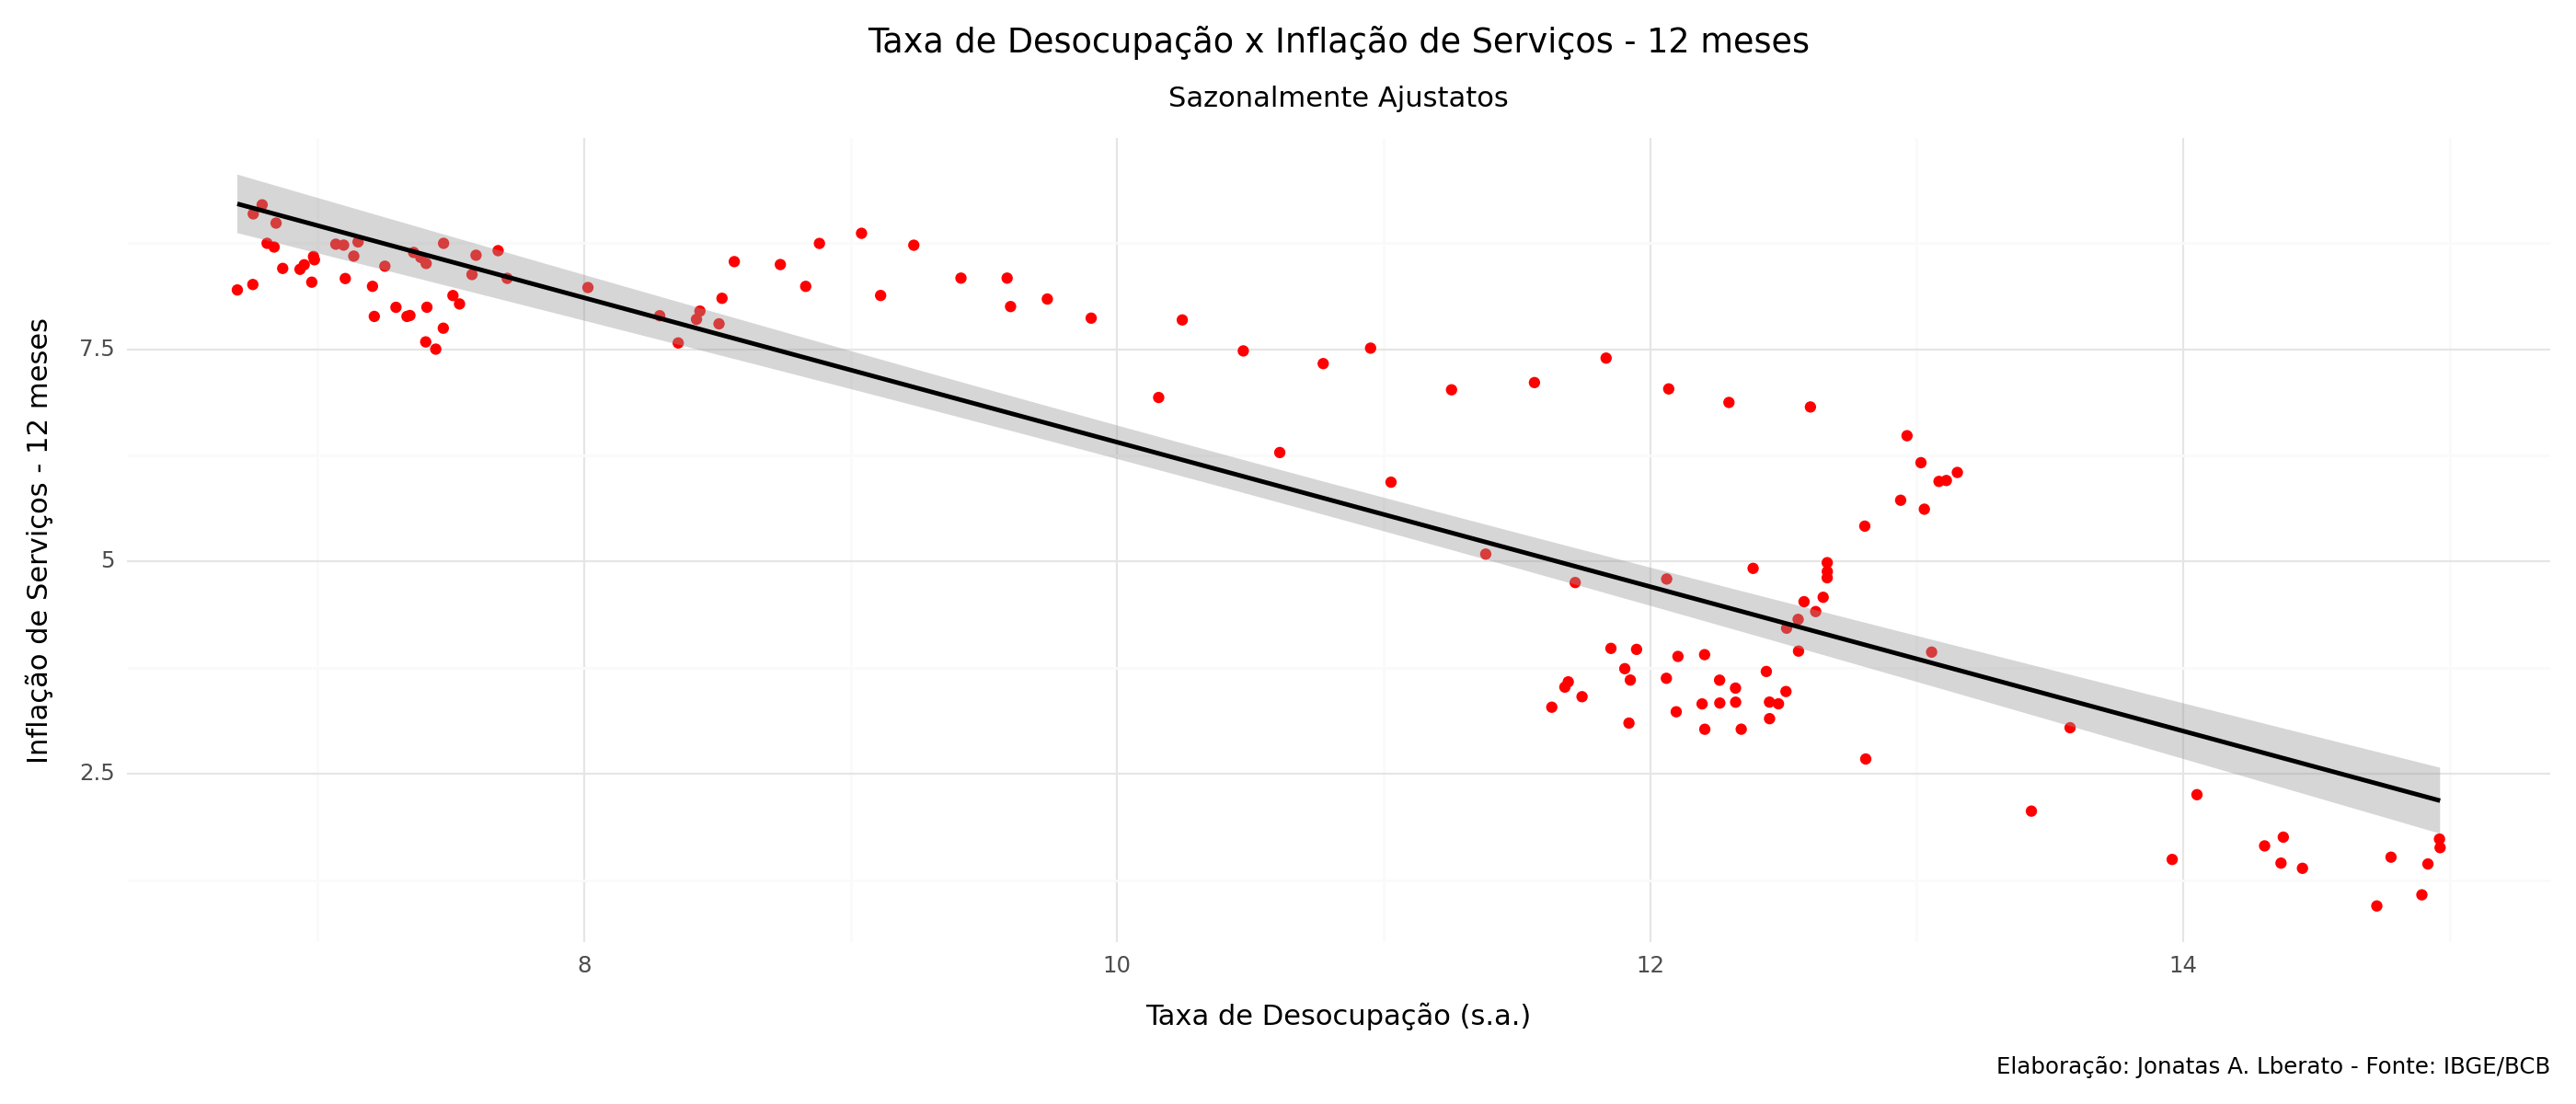

<Figure Size: (1400 x 600)>

In [56]:
# !pip install plotnine
from plotnine import *

(
    ggplot(ipca_12m_mm3m, aes(x='desocupacao_sa', y='ipca_servicos_12m')) +
    geom_point(color='red') +
    stat_smooth(method='lm') +
    labs(
        title=f'Taxa de Desocupação x Inflação de Serviços - 12 meses',
        subtitle='Sazonalmente Ajustatos',
        color='',
        x='Taxa de Desocupação (s.a.)',
        y='Inflação de Serviços - 12 meses',
        caption='Elaboração: Jonatas A. Lberato - Fonte: IBGE/BCB'
    ) +
    theme_minimal() +
    theme(
        figure_size=(14, 6),
        legend_position='bottom',
        plot_title=element_text(hjust=0.5),  # Ajusta a justificação do título
        plot_subtitle=element_text(hjust=0.5)  # Ajusta a justificação do subtítulo
    )
)


In [57]:
ipca_12m_mm3m

,Date,desocupacao,ipca_servicos,desocupacao_sa,ipca_servicos_sa,ipca_servicos_12m,ipca_servicos_3m
0,2011-03-01,NaN,0.85,NaN,0.987119,NaN,NaN
1,2011-04-01,NaN,0.54,NaN,0.641152,NaN,NaN
2,2011-05-01,NaN,0.59,NaN,0.882218,NaN,10.041954
3,2011-06-01,NaN,0.60,NaN,0.672450,NaN,8.783277
4,2011-07-01,NaN,0.42,NaN,0.489800,NaN,8.177869
...,...,...,...,...,...,...,...
139,2022-10-01,8.3,0.67,8.517457,0.537620,8.100597,6.512813
140,2022-11-01,8.1,0.13,8.434567,0.289904,7.949663,5.166807
141,2022-12-01,7.9,0.44,8.353062,0.091315,7.574801,3.675354
142,2023-01-01,8.4,0.60,8.506232,0.635715,7.799830,4.067733


### Causalidade de Granger

Aqui queremos responder a pegunta: *"Se eu souber como uma coisa mudou no passado, isso me ajuda a prever como outra coisa vai mudar no futuro?*

É aí que a **Causalidade de Granger** entra. Este é um conceito importante em análise de séries temporais e estatística, especialmente usado para investigar se uma série temporal pode ser útil na previsão de outra. A ideia central foi proposta pelo economista Clive Granger, que ganhou o Prêmio Nobel de Economia em 2003 por seu trabalho pioneiro nessa área.

O artigo intitulado: *"Granger causality in the frequency domain: derivation and applications
"* você pode conferir [aqui](https://www.jstor.org/stable/1912791).

- **Definição Básica:** <br>
A Causalidade de Granger sugere que se uma variável A "Granger-causa" uma variável B, então as informações passadas de A são úteis para prever B. Isso não implica causalidade no sentido estrito, mas sim uma relação temporal em que as mudanças em A precedem as mudanças em B.

-- 

- **Teste de Causalidade de Granger:**<br>
O teste associado à Causalidade de Granger envolve a criação de dois modelos:
1. **Modelo Restrito (sem A):** Um modelo que prevê B usando apenas suas próprias informações passadas.
2. **Modelo Irrestrito (com A):** Um modelo que prevê B usando as informações passadas de ambas as variáveis, A e B.

O teste estatístico compara a capacidade preditiva desses dois modelos para determinar se a inclusão de A melhora significativamente a precisão da previsão de B.

--

- **Pressupostos do Teste:**<br>
**Ordem de defasagem adequada:** É crucial escolher a ordem apropriada para as defasagens das variáveis A e B nos modelos. Uma ordem inadequada pode levar a resultados imprecisos.
**Estacionariedade:** As séries temporais devem ser estacionárias para garantir resultados confiáveis.

-- 

- **Exemplo Prático:**<br>
Considere duas séries temporais, A e B. Para testar se A Granger-causa B, os passos incluiriam:
1. Especificar a ordem máxima de defasagem a ser considerada.
2. Dividir os dados em conjuntos de treinamento e teste.
3. Ajustar os modelos restrição e irrestrito aos dados de treinamento.
4. Avaliar a precisão da previsão de ambos os modelos nos dados de teste.
5. Realizar um teste estatístico para determinar se a adição de A melhora significativamente a previsão de B.

-- 

**Conclusão:**<br>
Se o teste indicar que a adição de A melhora significativamente a previsão de B, então há evidências de Causalidade de Granger de A para B. Isso implica que as informações passadas de A contêm informações úteis para prever o comportamento futuro de B.

Lembrando que a Causalidade de Granger **não estabelece causalidade verdadeira**, mas apenas uma relação temporal na previsão entre as variáveis. É uma ferramenta útil, especialmente em economia, finanças e outras disciplinas que lidam com séries temporais.

Verificando estacionariedade das séries. Nós vimos que nos gráficos que não se configura isso, mas faremos testes estatísticos para confirmar.

In [58]:
granger_dados = (
    ipca_12m_mm3m
    .dropna()
    .set_index('Date')
)

# Altera o tipo do índice para Datetime e frequência mensal
granger_dados.index = pd.DatetimeIndex(granger_dados.index, freq = 'MS')

In [59]:
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning

warnings.filterwarnings("ignore", category=InterpolationWarning)

In [60]:
def adfuller_kpss_test(dataframe, signif = 0.05, verboose = False):
    # Realiza testes de AdFuller e KPSS para verificar a estacionaridade das colunas de um datafrane e imprime o relatório
    for coluna in dataframe.columns:
        series = dataframe[coluna]

        # Teste ADF
        adf_result = adfuller(series, autolag = 'AIC')
        adf_output = {'estatísticas_do_teste': round(adf_result[0], 4), 'valor_p': round(adf_result[1], 4), 'número_de_lags': round(adf_result[2], 4), 'número_de_observações': adf_result[3]}
        valor_p_adf = adf_output['valor_p']

        # Teste KPSS
        kpss_result = kpss(series)
        kpss_output = {'estatísticas_do_teste': round(kpss_result[0], 4), 'valor_p': round(kpss_result[1], 4), 'número_de_lags': round(kpss_result[2], 4)}
        valor_p_kpss = kpss_output['valor_p']

        def ajustar(valor, comprimento = 6):
            return str(valor).ljust(comprimento)

# ______________________________________________________________________________________________

         # Resumo do ADF
        print(f'Teste de Dickey-Fuller Aumentado em "{coluna}"', '\n', '-' * 47)
        print(f'Hipótese Nula: Os dados possuem raiz unitária. Não Estacionáros.')
        print(f'Nível de Significância = {signif}')
        print(f'Estatística do Teste = {adf_output["estatísticas_do_teste"]}')
        print(f'Número de Lags Escolhidos = {adf_output["número_de_lags"]}')

        for chave, valor in adf_result[4].items():
            print(f'Valor Crítico {ajustar(chave)} = {round(valor, 3)}')

        if valor_p_adf <= signif:
            print(f" => Valor-P = {valor_p_adf}.Rejeitando a Hipótese Nula.")
            print(f" => A série é Estacionária.")
        else:
            print(f" => Valor-P = {valor_p_adf}. Evidência fraca para rejeitar a Hipótese Nula.")
            print(f" => A série não é Estacionária.")
        print('\n')

# ______________________________________________________________________________________________
        
        # Resumo do KPSS
        print(f'Teste KPSS em "{coluna}"', '\n', '-' * 32)
        print(f'Hipótese Nula: A série é Estacionária ao redor de uma tendência determinística.')
        print(f'Nível de Significância = {signif}')
        print(f'Estatística do Teste = {kpss_output["estatísticas_do_teste"]}')
        print(f'Número de Lags Escolhidos = {kpss_output["número_de_lags"]}')

        for chave, valor in kpss_result[3].items():
            print(f'Valor Crítico {ajustar(chave)} = {round(valor, 3)}')

        if valor_p_kpss <= signif:
            print(f" => Valor-P = {valor_p_kpss}.Rejeitando a Hipótese Nula.")
            print(f" => A série NÃO é Estacionária.")
        else:
            print(f" => Valor-P = {valor_p_kpss}. Evidência fraca para rejeitar a Hipótese Nula.")
            print(f" => A série é Estacionária ao redor de uma tendência determinística.")
        print('\n')
        

In [61]:
granger_dados

,desocupacao,ipca_servicos,desocupacao_sa,ipca_servicos_sa,ipca_servicos_12m,ipca_servicos_3m
Date,,,,,,
2012-03-01,8.0,0.52,7.471642,0.665733,7.748715,8.930577
2012-04-01,7.8,0.77,7.410225,0.856539,7.995206,8.983672
2012-05-01,7.7,0.21,7.405783,0.510365,7.587231,8.130545
2012-06-01,7.6,0.52,7.443408,0.586790,7.501675,7.814772
2012-07-01,7.5,0.79,7.346450,0.852018,7.897767,7.796690
...,...,...,...,...,...,...
2022-10-01,8.3,0.67,8.517457,0.537620,8.100597,6.512813
2022-11-01,8.1,0.13,8.434567,0.289904,7.949663,5.166807
2022-12-01,7.9,0.44,8.353062,0.091315,7.574801,3.675354


In [62]:
# Aplicando a função ao DataFrame
print(adfuller_kpss_test(granger_dados[['desocupacao_sa', 'ipca_servicos_12m', 'ipca_servicos_3m']]))

Teste de Dickey-Fuller Aumentado em "desocupacao_sa" 
 -----------------------------------------------
Hipótese Nula: Os dados possuem raiz unitária. Não Estacionáros.
Nível de Significância = 0.05
Estatística do Teste = -1.681
Número de Lags Escolhidos = 1
Valor Crítico 1%     = -3.482
Valor Crítico 5%     = -2.884
Valor Crítico 10%    = -2.579
 => Valor-P = 0.4409. Evidência fraca para rejeitar a Hipótese Nula.
 => A série não é Estacionária.


Teste KPSS em "desocupacao_sa" 
 --------------------------------
Hipótese Nula: A série é Estacionária ao redor de uma tendência determinística.
Nível de Significância = 0.05
Estatística do Teste = 1.1145
Número de Lags Escolhidos = 6
Valor Crítico 10%    = 0.347
Valor Crítico 5%     = 0.463
Valor Crítico 2.5%   = 0.574
Valor Crítico 1%     = 0.739
 => Valor-P = 0.01.Rejeitando a Hipótese Nula.
 => A série NÃO é Estacionária.


Teste de Dickey-Fuller Aumentado em "ipca_servicos_12m" 
 -----------------------------------------------
Hipótese N

In [63]:
from statsmodels.tsa.stattools import adfuller, kpss

def adfuller_kpss_test(dataframe, signif=0.05, verboose=False):
    for coluna in dataframe.columns:
        series = dataframe[coluna]

        # Teste ADF
        adf_result = adfuller(series, autolag='AIC')
        print(f'Teste de Dickey-Fuller Aumentado em "{coluna}" \n', '-' * 47)
        print(f'Hipótese Nula: Os dados possuem raiz unitária. Não Estacionáros.')
        print(f'Nível de Significância = {signif}')
        print(f'Estatística do Teste = {adf_result[0]}')
        print(f'Número de Lags Escolhidos = {adf_result[2]}')

        for chave, valor in adf_result[4].items():
            print(f'Valor Crítico {chave} = {valor}')

        if adf_result[1] <= signif:
            print(f" => Valor-P = {adf_result[1]}. Rejeitando a Hipótese Nula.")
            print(f" => A série é Estacionária ao redor de uma tendência determinística.")
        else:
            print(f" => Valor-P = {adf_result[1]}. Evidência fraca para rejeitar a Hipótese Nula.")
            print(f" => A série é Estacionária.")
        print('\n')

        # Teste KPSS
        kpss_result = kpss(series)
        print(f'Teste KPSS em "{coluna}" \n', '-' * 32)
        print(f'Hipótese Nula: A série é Estacionária ao redor de uma tendência determinística.')
        print(f'Nível de Significância = {signif}')
        print(f'Estatística do Teste = {kpss_result[0]}')

        for chave, valor in kpss_result[3].items():
            print(f'Valor Crítico {chave} = {valor}')

        if kpss_result[1] <= signif:
            print(f" => Valor-P = {kpss_result[1]}. Rejeitando a Hipótese Nula.")
            print(f" => A série NÃO é Estacionária.")
        else:
            print(f" => Valor-P = {kpss_result[1]}. Evidência fraca para rejeitar a Hipótese Nula.")
            print(f" => A série é Estacionária ao redor de uma tendência determinística.")
        print('\n')

# Aplicando a função ao DataFrame
adfuller_kpss_test(granger_dados[['desocupacao_sa', 'ipca_servicos_12m', 'ipca_servicos_3m']])

Teste de Dickey-Fuller Aumentado em "desocupacao_sa" 
 -----------------------------------------------
Hipótese Nula: Os dados possuem raiz unitária. Não Estacionáros.
Nível de Significância = 0.05
Estatística do Teste = -1.6810408911654304
Número de Lags Escolhidos = 1
Valor Crítico 1% = -3.4816817173418295
Valor Crítico 5% = -2.8840418343195267
Valor Crítico 10% = -2.578770059171598
 => Valor-P = 0.44090629784666246. Evidência fraca para rejeitar a Hipótese Nula.
 => A série é Estacionária.


Teste KPSS em "desocupacao_sa" 
 --------------------------------
Hipótese Nula: A série é Estacionária ao redor de uma tendência determinística.
Nível de Significância = 0.05
Estatística do Teste = 1.1145308862792362
Valor Crítico 10% = 0.347
Valor Crítico 5% = 0.463
Valor Crítico 2.5% = 0.574
Valor Crítico 1% = 0.739
 => Valor-P = 0.01. Rejeitando a Hipótese Nula.
 => A série NÃO é Estacionária.


Teste de Dickey-Fuller Aumentado em "ipca_servicos_12m" 
 ---------------------------------------

> Importante:

Você deve ter notado uma mensagem de aviso 'InterpolationWarning'. Isso é quando realizamos um teste estatístico, ele compara um número chamado "estatística de teste" com valores críticos numa tabela. Se esse número está entre os valores da tabela, o programa precisa estimar o resultado ("interpolar"). O aviso apenas diz que essa estimativa pode ser menos precisa, mas não invalida o teste. É mais uma observação sobre a confiabilidade do resultado, não um erro crítico.

**Uma possível solução:"**<br>
Para evitar que essas mensagens de aviso apareçam, você pode ajustar o nível de significância (signif) que você está usando nos testes ADF e KPSS. Atualmente, você está usando signif = 0.05, mas você pode tentar aumentar para signif = 0.1 ou signif = 0.2. Isso tornará a região de rejeição menos restritiva.

#### Teste de Cointegração de Johansen

Realiza o teste de cointegração de Jonhansen e imprime resultados:

Parâmetros:<br>
- data: dataframe contendo as séries temporais
- det_order: ordem da tendência determinística (default = 0)
- k_ar_diff: ordem da tendência autoregressiva (default = 1)

Retorna: <br>
- none


In [64]:
def test_cointegration_johansen(data, det_order = 0, k_ar_diff = 1):
    # Aplicar o teste de cointegração de Jonhansen
    result = coint_johansen(data, det_order = det_order, k_ar_diff= k_ar_diff)

    # Obter os valores críticos para o teste de traço e máximo autovalor
    trace_stat_crit = result.trace_stat_crit_vals[:,0] # traço
    max_eigen_stat_crit = result.max_eig_stat_crit_vals[:, 0] # máximo autovalor

    # Comparar estatísticas com os valores críticos
    trace_stat = result.trace_stat
    max_eigen_stat = result.max_eig_stat

    # Imprimir resultados
    print('Estatística do Traço:', trace_stat)
    print('Valores Críticos para o Traço:', trace_stat_crit)
    print('\nEstatística do Máximo Autovalor:', max_eigen_stat)
    print('Valores Críticos para o Máximo Autovalor:', max_eigen_stat_crit)

    # Verificar se há cointegração com base nos valores críticos
    trace_cointegration = any(trace_stat > trace_stat_crit)
    max_eigen_cointegration = any(max_eigen_stat > max_eigen_stat_crit)

    # Imprimir resultado do teste de cointegração
    print('\nTeste de Cointegração (Traço):', trace_cointegration)
    print('Teste de Cointegração (Máximo Autovalor):', max_eigen_cointegration)


In [65]:
test_cointegration_johansen(granger_dados[['desocupacao_sa', 'ipca_servicos_12m']], k_ar_diff= 10)

Estatística do Traço: [15.52762034  4.41406291]
Valores Críticos para o Traço: [13.4294  2.7055]

Estatística do Máximo Autovalor: [11.11355744  4.41406291]
Valores Críticos para o Máximo Autovalor: [12.2971  2.7055]

Teste de Cointegração (Traço): True
Teste de Cointegração (Máximo Autovalor): True


In [66]:
test_cointegration_johansen(granger_dados[['desocupacao_sa', 'ipca_servicos_3m']], k_ar_diff= 2)

Estatística do Traço: [33.48573509  3.41816564]
Valores Críticos para o Traço: [13.4294  2.7055]

Estatística do Máximo Autovalor: [30.06756945  3.41816564]
Valores Críticos para o Máximo Autovalor: [12.2971  2.7055]

Teste de Cointegração (Traço): True
Teste de Cointegração (Máximo Autovalor): True


#### Teste de Causalidade de Granger (Toda-Yamamoto)

In [67]:
# Ajustar o modelo VECM IPCA 12 meses e Taxa de Desocupação
model_12m = VECM(granger_dados[['desocupacao_sa', 'ipca_servicos_12m']], k_ar_diff= 10)
result_12m = model_12m.fit()

In [68]:
# Realizar o teste de causalidade de Granger (desocupacao_sa -> ipca_servicos_12m)
granger_desoc_12m = result_12m.test_granger_causality(caused = 'ipca_servicos_12m', causing = 'desocupacao_sa')
display(granger_desoc_12m.summary())

Test statistic,Critical value,p-value,df
1.730,1.839,0.069,"(11, 192)"


In [69]:
# Realizar o teste de causalidade de Granger (ipca_servicos_12m -> desocupacao_sa)
granger_desoc_12m = result_12m.test_granger_causality(caused = 'desocupacao_sa', causing = 'ipca_servicos_12m')
display(granger_desoc_12m.summary())

Test statistic,Critical value,p-value,df
1.149,1.839,0.326,"(11, 192)"


---

In [70]:
# Ajustar o modelo VECM IPCA 3 meses e Taxa de Desocupação
model_3m = VECM(granger_dados[['desocupacao_sa', 'ipca_servicos_3m']], k_ar_diff= 2)
result_3m = model_3m.fit()

In [71]:
# Realizar o teste de causalidade de Granger (desocupacao_sa -> ipca_servicos_3m)
granger_desoc_3m = result_3m.test_granger_causality(caused = 'ipca_servicos_3m', causing = 'desocupacao_sa')
display(granger_desoc_12m.summary())

Test statistic,Critical value,p-value,df
1.149,1.839,0.326,"(11, 192)"


In [72]:
# Realizar o teste de causalidade de Granger (ipca_servicos_3m -> desocupacao_sa)
granger_desoc_3m = result_3m.test_granger_causality(caused = 'desocupacao_sa', causing = 'ipca_servicos_3m')
display(granger_desoc_3m.summary())

Test statistic,Critical value,p-value,df
0.1444,2.642,0.933,"(3, 240)"


## Agradecimentos e Próximos Capítulos

Eu queria agradecer meupaiminhamãemeusbichinhosmeusavósmeuPS5aoBlackSabbath e....

É isso, gente. <br>
Essa é só a primeira parte do estudo que terá 3 capítulos (eu acho). Gostaria de abordar diversos outros indicadores, plots e modelos, mas dixarei para os próximos pois vocês já devem estar de sacola cheia com as minhas zoeiras.

Tentei ser o mais didático e simples possível, abordar uma temática econômica sem *"economês"* é complicado.

Para os próximos capítulos espere por:
- Núcleos de inflação
- Impactos climáticos no IPCA
- Ancoragem
- Inflação de serviços x Desocupação
- Influência externa no cenário nacional
- Peso do Juro Real x Juro Neutro

#### **Próximos estudos:**

Além disso, aguardem que os próximos estudos serão:
1. Dívida pública brasileira
2. Saúde econômica americana
3. Mitos sobre a Crise 1929
4. Estudo sobre preços de combustíveis
5. e....vou pensar!


### Leituras recomendadas:

1. [Macroeconomia Capa - Olivier Blanchard](https://amzn.to/3Tbf93K)
2. [Microeconomia - Hal Varian](https://amzn.to/46MRUjL)
3. [A Moeda e a Lei - Gustavo Franco](https://amzn.to/47J8FxC)
4. [Por que o Brasil Cresce Pouco? - Marcos Mendes](https://amzn.to/46JqlHX)
5. [Finanças públicas - Felipe Salto e Mansueto](https://amzn.to/3Rv5pzY)
6. [Quantitative Trading Strategies Using Python - Peng Liu](https://amzn.to/4a5WH2z)

## FIM